Import Library yang diperlukan

In [42]:
# library dasar untuk membaca data, pengolahan data hingga visualisasi data
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk data preprocessing, machine learning unsupervised, dan preprocessor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# library untuk menghilangkan pesan warning agar tidak mengganggu tampilan story telling
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=RuntimeWarning)
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

Membaca Data Json dengan `pd.read_json` dari pandas, merupakan library dari pyton untuk membaca data

berdasarkan informasi sekilas, data ini merupakan data-data tugas pengiriman yang dilakukan oleh para kurir ke penerima pesanan

In [43]:
# baca data json
df_sample = pd.read_json('data-sample.json')
df_sample.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


setelah data dibaca dan ditampilkan dalam PDF, ternyata ada kolom yang ternyata berisi dictionary, yang terdiri dari lebih dari 1 value

In [44]:
df_sample[['taskLocationDone','cod','UserVar']].head(20)

,taskLocationDone,cod,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}","{'amount': 685000, 'received': True}","{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}","{'amount': 53500, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}","{'amount': 179500, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}","{'amount': 31815, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}","{'amount': 144562, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
5,"{'lon': 110.0231309, 'lat': -7.7066465}","{'amount': 206610, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
6,"{'lon': 109.7629103, 'lat': -6.9266078}","{'amount': 38200, 'received': True}","{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
7,"{'lon': 109.7291414, 'lat': -6.9115881}","{'amount': 33000, 'received': True}","{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
8,"{'lon': 109.7803235, 'lat': -7.6637309}","{'amount': 65867, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
9,"{'lon': 109.780821, 'lat': -7.6632882}","{'amount': 26800, 'received': True}","{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


In [ ]:
# df_sample[['taskLocationDone', 'cod', 'UserVar']]

# df_sample['taskLocationDone'].head(10)

# temp_loc = df_sample['taskLocationDone']
# temp_loc[0]['lan'].items()
# for tl in temp_loc[0]:
#     for k, v in temp_loc[0][tl].items():
#         print(k, v)

# df_sample['taskLocationDone'].apply(lambda x: x['lat'])

# if isinstance('taskLocationDone', str):
#     location_dict = json.loads('taskLocationDone')
#     # ambil value key dari dict dengan get
#     return 'taskLocationDone'.get('lat')
# # memeriksa jika objek adalah instance dictionary atau bukan
# elif isinstance('taskLocationDone', dict):
#     return'taskLocationDone'.get('lat')
# # memeriksa jika object bukan dictionary ataupun string
# else:
#     return np.nan

# try :
#     # memeriksa jika objek adalah instance string atau bukan
#     if isinstance(df_sample['taskLocationDone'], str):
#         location_dict = json.loads(df_sample['taskLocationDone'])
#         # jika dia adalah string
#         print('this is string')
# except:
#     # jika dia bukan string
#     print('this is not string')
# # tidak ada output

# try :
#     # memeriksa jika objek adalah instance dictionary atau bukan
#     if isinstance(df_sample['taskLocationDone'], dict):
#         # jika dia adalah dictionary
#         print('this is dict')
# except:
#     # jika dia bukan dictionary
#     print('this is not dictionary')
# # tidak ada output

# # if isinstance(df_sample['taskLocationDone'], str):
# if isinstance(df_sample['taskLocationDone'][0], str):
#     # location_dict = json.loads(df_sample['taskLocationDone'])
#     location_dict = json.loads(df_sample['taskLocationDone'][0])
#     # jika dia adalah string
#     print(location_dict + ' and this is string')
# else:
#     print('this is not string')
# # output : this is not string

# # if isinstance(df_sample['cod'], str):
# if isinstance(df_sample['cod'][0], str):
#     # location_dict = json.loads(df_sample['cod'])
#     location_dict = json.loads(df_sample['cod'][0])
#     # jika dia adalah string
#     print(location_dict + ' and this is string')
# else:
#     print('this is not string')
# # output : this is not string

# # if isinstance(df_sample['taskLocationDone'], dict):
# if isinstance(df_sample['taskLocationDone'][0], dict):
#     # jika dia adalah dictionary
#     print('this is dict')
# else:
#     print('this is not dictionary')
# # output : this is not dictionary

# # if isinstance(df_sample['cod'], dict):
# if isinstance(df_sample['cod'][0], dict):
#     # jika dia adalah dictionary
#     print('this is dict')
# else:
#     print('this is not dictionary')
# # output : this is not dictionary

# temp_cod = df_sample['cod']
# temp_cod[0]
# temp_codamount = [tc.get('amount') for tc in temp_cod]
# temp_codstat = [tc.get('received') for tc in temp_cod]
# df_sample['cod_status'] = [rec.get('received') for rec in df_sample['cod']]

# define a function to extract the amount and received values from a JSON object
# def extract_values(json_obj):
#     amount = json_obj['amount']
#     received = json_obj['received']
#     return pd.Series({'amount': amount, 'received': received})

# for tu in temp_user[0]:
#     print(tu)

# del temp_cod, temp_branch_dest, temp_branch_ori, temp_destat temp_detstatlab, temp_loc, 
# del temp_taskstat, temp_taskstatlabel, temp_user, temp_user_city, temp_weight

setelah menggunakan berbagai cara yang dilakukan dari codingan yang di comment diatas, dengan bantuan dan saran dari Chat GPT, bahwa solusi terbaiknya mengggunakan 
- if instance untuk memeriksa jika object yang diterima adalah string atau dictionary 
- kemudian function get dictionary keys untuk mengambil value dari key dictionary yang ditransform menjadi kolom bary
- kedua function tersebut digabungkan dalam satu function, yang masing-masing dijalankan pada function apply

In [45]:
# function untuk parse latitude dari kolom TaskLocationDone
def parse_lat_location(location_json):
    # memeriksa jika objek adalah instance string atau bukan
    if isinstance(location_json, str):
        location_dict = json.loads(location_json)
        # ambil value key dari dict dengan get
        return location_dict.get('lat')
    # memeriksa jika objek adalah instance dictionary atau bukan
    elif isinstance(location_json, dict):
        return location_json.get('lat')
    # memeriksa jika object bukan dictionary ataupun string
    else:
        return np.nan

# function untuk parse longitude dari kolom TaskLocationDone
def parse_longitude_location(location_json):
    if isinstance(location_json, str):
        location_dict = json.loads(location_json)
        return location_dict.get('lon')
    elif isinstance(location_json, dict):
        return location_json.get('lon')
    else:
        return np.nan    

# function untuk parse amount dari kolom cod
def parse_cod_amount(cod_column):
    if isinstance(cod_column, str):
        location_dict = json.loads(cod_column)
        return location_dict.get('amount')
    elif isinstance(cod_column, dict):
        return cod_column.get('amount')
    else:
        return np.nan
    
# function untuk parse received dari kolom cod    
def parse_cod_received(cod_column):
    if isinstance(cod_column, str):
        location_dict = json.loads(cod_column)
        return location_dict.get('received')
    elif isinstance(cod_column, dict):
        return cod_column.get('received')
    else:
        return np.nan

Jalankan function diatas dengan method apply untuk memecah kolom yang berisi dictionary agar terpisah menjadi kolom baru

untuk kolom yang berasal dari uservar, maka diekstraksi menggunakan list comprehension yang juga mengambil key dictionary dengan method get

In [46]:
# apply function parse lattitude and parse longitude location from task location done columnmn
df_sample['task_lattitude_done'] = df_sample['taskLocationDone'].apply(parse_lat_location)
df_sample['task_longitude_done'] = df_sample['taskLocationDone'].apply(parse_longitude_location)

# apply function parse cod amount dan parse cod received
df_sample['cod_amount'] = df_sample['cod'].apply(parse_cod_amount)
df_sample['cod_received'] = df_sample['cod'].apply(parse_cod_received)

# jalankan list comprehensive untuk get tiap row dengan key branch_dest pada kolom uservar
df_sample['user_branch_dest'] = [tu.get('branch_dest') for tu in df_sample['UserVar']]
df_sample['user_tasks_label'] = [tu.get('taskStatusLabel') for tu in df_sample['UserVar']]
df_sample['user_receiver_city'] = [tu.get('receiver_city') for tu in df_sample['UserVar']]
df_sample['user_detaillabel'] = [tu.get('taskDetailStatusLabel') for tu in df_sample['UserVar']]
df_sample['user_detail_status'] = [tu.get('taskDetailStatus') for tu in df_sample['UserVar']]
df_sample['user_items_weight'] = [tu.get('weight') for tu in df_sample['UserVar']]
df_sample['user_branch_origin'] = [tu.get('branch_origin') for tu in df_sample['UserVar']]
df_sample['user_task_status'] = [tu.get('taskStatus') for tu in df_sample['UserVar']]

# rename semua kolom untuk mengubah format penamaan kolom
df_sample.rename(columns={'taskCreatedTime':'task_created_time', 'taskAssignedTo':'task_assign_to', 'taskCompletedTime':'task_completed_time',
                         'taskStatus':'task_status', 'taskId':'task_id'}, inplace=True)
# menghapus kolom yang tidak digunakan
df_sample.drop(columns=['taskLocationDone', 'cod', 'UserVar'], inplace=True)
# mengurutkan ulang kolom seperti urutan semula 
df_sample = df_sample[['task_longitude_done', 'task_lattitude_done', 'task_created_time', 'cod_amount', 'cod_received', 'task_assign_to', 
                     'task_completed_time', 'task_status', 'flow', 'task_id', 'user_branch_dest', 'user_tasks_label', 'user_receiver_city', 
                     'user_detaillabel', 'user_detail_status', 'user_items_weight', 'user_branch_origin', 'user_task_status']]

informasi dari dataset terkait nama-nama kolom dengan jumlah baris data yang kosong dan jumlah tipe data

dan ternyata kalau datanya banyak yang baris yang hilang atau null value

In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   task_longitude_done  7566 non-null   float64
 1   task_lattitude_done  7566 non-null   float64
 2   task_created_time    8334 non-null   object 
 3   cod_amount           2358 non-null   float64
 4   cod_received         2358 non-null   object 
 5   task_assign_to       8333 non-null   object 
 6   task_completed_time  7566 non-null   object 
 7   task_status          8334 non-null   object 
 8   flow                 8334 non-null   object 
 9   task_id              8334 non-null   object 
 10  user_branch_dest     8334 non-null   object 
 11  user_tasks_label     7572 non-null   object 
 12  user_receiver_city   8282 non-null   object 
 13  user_detaillabel     7572 non-null   object 
 14  user_detail_status   7572 non-null   object 
 15  user_items_weight    8334 non-null   o

berikut merupakan percobaan untuk mengekstraksi kolom `user_receiver_city` yang dipecah menjadi kolom kota `user_receiver_city` dan `user_receiver_regenecy` 
- data tersebut diperoleh dengan dipisah oleh koma
- namun sayangnya semua upaya dilakukan untuk membersihkan data kota dan kabupaten
- bahkan untuk mencari nama2 kota yang tidak sesuai sebanyak 8000an baris dengan bantuan ChatGPT sudah dilakukan
- semua upaya dengan membuat mapping, str replace hingga split sudah dilakukan
- semuanya menunjukan hasil yang nihil, karena hasilnya NaN semua atau null semua
- makany dibatalkan

In [58]:
# df_sample['user_receiver_city'] = df_sample['user_receiver_city'].str.split(',',expand=True)[0]
# df_sample['user_receiver_city']

# temp_receiver_city = df_sample['user_receiver_city'].str.split(',',expand=True)
# temp_receiver_city.info()
# print(temp_receiver_city[0].value_counts())
# print(temp_receiver_city[1].unique())
# print(temp_receiver_city[2].unique())
# temp_clean_city = temp_receiver_city[0]
# temp_clean_regency = temp_receiver_city[1]

# # for iteration replace to ''

# replaced_these_forcity = ['KEC.','KAB.','KAB.SUK','TJ.EN', 'KABUPATEN','KAB.','KAB',',','-','None']
# for to_replaced in replaced_these_forcity:
#     # temp_receiver_city[0] = temp_receiver_city[0].str.replace(to_replaced,'')
#     temp_clean_city = temp_clean_city.astype(str)
#     temp_clean_city = temp_clean_city.str.strip()
#     temp_clean_city = temp_clean_city.str.rstrip()
#     temp_clean_city = temp_clean_city.str.lstrip()
#     temp_clean_city = temp_clean_city.str.replace(to_replaced,'')
#     temp_clean_city = temp_clean_city.str.replace(r"\\N", '',regex=True)
    

# # replace by mapping
# city_mapping = {'BANDUNG KAB' : 'BANDUNG', 'BANDUNG BARAT KAB' : 'BANDUNG', 'KAB. BELITUNG TIMUR' : 'BANDUNG', 'KEC.RUTENG' : 'RUTENG',
#  'BY PASS NGR RAI':'BYPASS NGGURAH RAI','JL CEMARA NO 74 SANU':'SANUR', 'MENTOK (MUNTOK)': 'MUNTOK', 'TELUK AMBON BAGUALA':'TELUK AMBON',
#  'VI LINGKUNG':'LINGKUNG', 'II.X.XI.LINGKUNG':'LINGKUNG' ,'II.X.XI.VI LINGKUNG':'LINGKUNG','II.X.XI. LINGKUNG':'LINGKUNG',
#  'KARANGTENGAH TA' :'KARANGTENGAH', 'KARANG TENGAH':'KARANGTENGAH', 'BANJAR BARU': 'BANJARBARU', 'PADANG SIDEMPUAN SEL':'PADANG SIDEMPUAN',
#  'GOLEWA SLTN':'GOLEWA SELATAN', 'UMBU RATU NGGAY BARA' :'UMBU RATU NGGAY', 'JABUNG / GN. BALAK' : 'JABUNG', 'TERBANGGIBESAR / BAN' : 'TERBANGGIBESAR',
#  'GIRIWOYO. WONOGIRI' : 'GIRIWOYO', 'BATURETNO. WONOGIRI' : 'BATURETNO', 'JATISRONO. WONOGIRI' : 'JATISRONO', 'SLOGOHIMO.WONOGIRI' : 'SLOGOHIMO',
#  'PURWANTORO. WONOGIRI' : 'PURWANTORO', 'SEPATAN / JATMULYA' : 'SEPATAN', 'KOSAMBI / SELEMBARAN' : 'KOSAMBI', 'TIMOR TENGAH SE'  : 'TIMOR TENGAH',
#  'BINTAN TIMUR / KIJAN' : 'BINTAN TIMUR',  'PURWOREJO/KLAMPOK' : 'PURWOREJO', 'ABAB ( PENUKAL ABAB' : 'ABAB', 'KAB.LUWU T' : 'LUWU',
#  'P.LAUT UTARA':'PULAU LAUT', 'P.LAUT TIMUR' : 'PULAU LAUT', 'KAB. TANA T' : 'TANA TORAJA', 'DAMAR BELITUNG T' : 'DAMAR BELITUNG',  
#  'RANTEPAO  TANA T':'RANTEPAO', 'BALAI BT' : 'BALAI', 'PEKALONGAN UTARA PEK' : 'PEKALONGAN UTARA' , 'RAWAJITU TIMUR T' : 'RAWAJITU TIMUR', 
#  'JL DANAU POSO NO 107' : 'JAKARTA PUSAT', 'JL KREKOT JAYA MOLEK' : 'JAKARTA PUSAT', 'JAKARTA 10620': 'JAKARTA PUSAT', 'KELAPA GADING':'JAKARTA UTARA',  
#  'TANAH ABANG' : 'JAKARTA PUSAT', 'KEMAYORAN' : 'JAKARTA PUSAT',  'JAKARTA UTARA 14420' : 'JAKARTA UTARA', 'JAKARTA UTARA 14460' : 'JAKARTA UTARA',  
#  'JAKARTA 14240' : 'JAKARTA UTARA', 'JL JANUR INDAH VI LA':'JAKARTA UTARA', 'JL JANUR INDAH VI LA':'JAKARTA UTARA','JL JANUR INDAH 7':'JAKARTA UTARA',  
#  'DUREN SAWIT' : 'JAKARTA TIMUR', 'JATINEGARA' : 'JAKARTA TIMUR', 'KEBON JERUK':'JAKARTA BARAT', 'GROGOL':'JAKARTA BARAT', 'KEMANG':'JAKARTA SELATAN',  
#  'KEBAYORAN BARU':'JAKARTA SELATAN', 'KEBAYORAN LAMA':'JAKARTA SELATAN', 'KEBAYORAN' : 'JAKARTA SELATAN','BEKASI 17112' : 'BEKASI',  
#  'CIBITUNG':'BEKASI',  'BOGOR 16710' : 'BOGOR', 'LAWANG KIDULTJ.ENIM':'LAWANG KIDUL','SUMATERA SELATAN':'', 'JAWA TENGAH':'', 'PATI JAWA TENGAH':'',
#  'SUMBA B.':'' ,'KAB.SUMBA B' :'', 'UTARA KAB' :''}

# # temp_clean_city = pd.Series(temp_clean_city)
# temp_clean_city = temp_clean_city.map(temp_clean_city)

# replaced_these_foregen = ['KABUPATEN', 'KAB', 'KAB.', 'K.', 'KOTA', 'KOTA.', 'None', ',','-']

# for replace_regen in replaced_these_foregen:
#     # temp_receiver_city[1] = temp_receiver_city[1].str.replace(replace_regen,'')
#     temp_clean_regency = temp_clean_regency.astype(str)
#     temp_clean_regency = temp_clean_regency.str.strip()
#     temp_clean_regency = temp_clean_regency.str.rstrip()
#     temp_clean_regency = temp_clean_regency.str.lstrip()
#     temp_clean_regency = temp_clean_regency.str.replace(replace_regen,'')
#     temp_clean_regency = temp_clean_regency.str.replace(r"\\N", '',regex=True)
    

# regency_mapping = {'BOJON':'BOJONGSOANG', 'BO':'BOJONGSOANG', 'LUW' : 'LUWU', 'LUWU UTA': 'LUWU UTARA', 'LUWU TIMU':'LUWU TIMUR', 'KLAT':'KLATEN', 
#  'LUMAJAN':'LUMAJANG', 'BANTAEN':'BANTEN', 'INDRAGIR':'INDRAGIRI', 'LAMPUN' : 'LAMPUNG', 'LAMPU' : 'LAMPUNG', 'SITUBO' : 'SITOBONDO',  
#  'LAMONGA': 'LAMONGAN', 'GROBOG' : 'GROBOGAN', 'LAMPUNG B': 'LAMPUNG BARAT', 'KOTABA': 'KOTABARU', 'SUMBAW': 'SUMBAWA', 'SUMBA T': 'SUMBA TIMUR', 
#  'SUMBAWA BA': 'SUMBAWA BARAT', 'GORONTA' : 'GORONTALO', 'GORONTAL' : 'GORONTALO','BONTA' : 'BONTANG', 'BONT' : 'BONTANG', 'GERUNG': 'LOMBOK BARAT', 
#  'YOGYAKART': 'YOGYAKARTA', 'YOGYAKAR': 'YOGYAKARTA', 'ARGAMAKM' : 'ASAHAN', 'WAKA' : 'WAKATOBI', 'PAMANU': 'PAMANUKAN', 'MA':'MALANG', 'MALA':'MALANG', 
#  'MALAN' :'MALANG', 'PANGKALAN BR' :'PANGKALAN BRANDAN', 'PURWA': 'PURWAKARTA', 'PURWAKART': 'PURWAKARTA','JAKART': 'JAKARTA', 'JKT': 'JAKARTA', 
#  'JKT S': 'JAKARTA', 'JAKAR': 'JAKARTA', 'JAKARTA S': 'JAKARTA', 'JAKARTA SEL': 'JAKARTA', 'JAKARTA SELATA': 'JAKARTA', 'JAKARTA P': 'JAKARTA',
#  'JAKARTA PUS': 'JAKARTA', 'JAKARTA PUSA': 'JAKARTA', 'JAKARTA BARA': 'JAKARTA', 'JAKARTA BA': 'JAKARTA', 'JAKARTA B': 'JAKARTA', 
#  'JAKARTA TIMU': 'JAKARTA', 'JAKARTA TI': 'JAKARTA', 'KUNINGA': 'JAKARTA', 'KUNING':'JAKARTA', 'BAND': 'BANDUNG', 'BANDUN': 'BANDUNG', 
#  'WONOGIR': 'WONOGIRI', 'PEMALAN':'PEMALANG', 'BELITUNG TIM': 'BELITUNG TIMUR', 'BUKITT': 'BUKITTINGGI', 'PAMEKA':'PAMEKASAN', 'TERN': 'TERNATE',  
#  'TERNA': 'TERNATE', 'TERNAT': 'TERNATE', 'TIMOR T': 'TIMOR TENGAH', 'MARISA': 'PUHWATO', 'MUKO-M': 'MUKOMUKO', 'MUKO-MU': 'MUKOMUKO', 
#  'TASIKMA': 'TASIKMALAYA', 'TASIKMAL': 'TASIKMALAYA', 'TASI': 'TASIKMALAYA', 'TAIS': 'TASIKMALAYA', 'TAPANULI TEN': 'TAPANULI TENGAH', 
#  'TAPANULI TENG': 'TAPANULI TENGAH', 'CIKAR': 'CIKARANG', 'CIKARA': 'CIKARANG', 'KUTAI KARTA':'KUTAI KERTANEGARA', 'PANGAND':'PANGANDARAN',
#  'PANGAN':'PANGANDARAN', 'PURWOKERT': 'PURWOKERTO' , 'TAN' : 'TANA TORAJA', 'TANA TORA': 'TANA TORAJA', 'T. JABUNG' : 'TEBO JABUNG', 
#  'MOJOKE': 'MOJOKERTO', 'PALANGKA': 'PALANGKARAYA', 'BANDARLAMPU': 'BANDARLAMPUNG',  'BANDARLAMP': 'BANDARLAMPUNG', 'MAJALENG': 'MAJALENGKA', 
#  'MAJALENGK': 'MAJALENGKA', 'CIANJ': 'CIANJUR', 'CIANJU': 'CIANJUR', 'BANGKA SELATA':'BANGKA SELATA', 'CILACA': 'CILACAP', 'TRENGGALE': 'TRENGGALEK',
#  'SERAM BA': 'SERAM BARAT', 'WOHA' : 'HAHORI KEPULAUAN', 'SAM' : 'SAMBAS', 'PURWODAD': 'PURWODADI', 'PURWAK': 'PURWAKARTA', 'SUMED':'SUMEDANG', 
#  'PANGKA': 'PANGKAJENE', 'PANGKALP': 'PANGKAJENE', 'PANGKAL P': 'PANGKAJENE', 'PANGKALPI': 'PANGKAJENE', 'BAROS': 'SERANG', 'TIGARAKSA': 'TANGERANG', 
#  'TANGE': 'TANGERANG', 'TANGER': 'TANGERANG', 'TANGERAN': 'TANGERANG', 'TANGERANG SEL.': 'TANGERANG SELATAN', 'DEN': 'DENPASAR', 'DENPA': 'DENPASAR', 
#  'TANAH G': 'TANAH GROGOT', 'SEMA': 'SEMARANG', 'SEMAR': 'SEMARANG', 'BANJARNEGAR': 'BANJARNEGARA', 'BANJARNEGA': 'BANJARNEGARA', 
#  'BANJARNEG': 'BANJARNEGARA','LUBUK': 'LUBUKLINGAU', 'PONORO': 'PONOROGO', 'PEKANBAR' : 'PEKANBARU', 'PEKANB' : 'PEKANBARU', 'PEKANBAR' : 'PEKANBARU', 
#  'TEKANBARU' : 'PEKANBARU', 'PEKAN...' : 'PEKANBARU', 'PALE': 'PALEMBANG', 'PALEM': 'PALEMBANG', 'PALEMBAN': 'PALEMBANG', 'PALEMB': 'PALEMBANG',
#  'PASURUA': 'PASURUAN', 'BEKAS': 'BEKASI', 'JAYAP': 'JAYAPURA', 'MUSI BANY' : 'MUSI BANYUASIN', 'SEKA': 'MUSI BANYUASIN', 'SEKAYU': 'MUSI BANYUASIN',
#  'MUARA': 'MUARA ENIM', 'MUARAEN': 'MUARA ENIM', 'MUARAE': 'MUARA ENIM', 'MUARA EN': 'MUARA ENIM', 'MUARA ENI': 'MUARA ENIM', 'SURABAYA B': 'SURABAYA', 
#  'GUNUNGS': 'GUNUNG SITOLI', 'TIDORE KE': 'TIDORE KEPULAUAN', 'TIDORE K': 'TIDORE KEPULAUAN', 'BANGK': 'BANGKA', 'BANG': 'BANGKA', 'SANGAT': 'SANGATTA', 
#  'KONAWE UTR': 'KONAWE UTARA', 'AROSUK': 'AROSUKA', 'NGANJU' : 'NGANJUK', 'NGAN': 'NGANJUK', 'NIAS SLTN': 'NIAS SELATAN', 'TEBING TING':'TEBING TINGGI', 
#  'PENAJAM PAS': 'PENAJAM PASER', 'MAMUJU UT': 'MAMUJU UTARA',  'MALUKU TE': 'MALUKU TENGAH', 'KOTABU': 'KOTABUMI', 'CIREBON U': 'CIREBON', 
#  'KARAW': 'KARAWANG', 'PARIGI MO': 'PARIGI MOUTONG', 'TARA': 'TARAKAN', 'RANGKA': 'RANGKASIBITUNG', 'SAMA': 'SAMARINDA', 'BANY': 'BANYUMAS', 
#  'OGAN K UL' : 'OGAN KOMERING ULU', 'LARANTUK': 'LARANTUKA', 'PIRU': 'PIRINGO', 'BUNT': 'BUNUTENGAH','AGA':'', 'BENGK':'', 'BENG':'', 'BANJA':'', 
#  'BD.':'','JAY':'','PUR':'','PA':'', 'KE':'', 'KA':'','PRA':'', 'SEI R':'', 'P':'', 'S':'', 'B':'', 'SUM':'', 'PE':'', 'R':'', 'BE':'', 'MAR':'', 
#  'PA':'', 'PAL':'', 'KERI':'','RAYA':'', 'TULANG':'', 'TG':'' , 'B':'' , 'BAN':'', 'BA':'', 'PON':'', 'PO':'', 'CILA':'', 'CIL':'', 'TANJUN':'', 
#  'TANJU':'', 'TANJU':'', 'PIRU':''}

# # temp_clean_regency = pd.Series(temp_clean_regency)
# temp_clean_regency = temp_clean_regency.map(temp_clean_regency)

# temp_receiver_city[0]

# temp_clean_city
# for replace_regen in replaced_these_forcity:
#     print(replace_regen)
# for rc in replaced_these_forcity:
#     print(rc)

# for ur_city in temp_receiver_city[0]:
#     ur_city = str(ur_city)
#     ur_city = ur_city.replace('KARANG TENGAH','KARANGTENGAH')
#     ur_city = ur_city.replace('BANJAR BARU', 'BANJARBARU')
#     ur_city = ur_city.replace('None','')
#     ur_city = ur_city.replace('BY PASS NGR RAI','BYPASS NGGURAH RAI')
#     ur_city = ur_city.replace('KOTA', '')
#     ur_city = ur_city.replace('KABUPATEN', '')
#     # ur_city = ur_city.replace('KAB.', '')
#     ur_city = ur_city.replace('KAB','')
#     ur_city = ur_city.replace('VI LINGKUNG', 'LINGKUNG')
#     ur_city = ur_city.replace('II.X.XI.LINGKUNG', 'LINGKUNG')
#     ur_city = ur_city.replace('II.X.XI.VI LINGKUNG', 'LINGKUNG')
#     ur_city = ur_city.replace('II.X.XI. LINGKUNG', 'LINGKUNG')
#     # ur_city = ur_city.replace('.','')
#     ur_city = ur_city.replace(',','')
#     ur_city = ur_city.replace('-','')
#     ur_city = ur_city.lstrip()
#     ur_city = ur_city.rstrip()
#     print(ur_city)

# temp_receiver_city[1]
# temp_clean_regency

# temp_receiver_city[0].unique()

# for ur_regency in temp_receiver_city[1]:
#     print(ur_regency)

# temp_receiver_city[1].value_counts()

# # menggunakan library fuzzywuzzy
# from fuzzywuzzy import fuzz

# # membuat dictionary untuk mapping nama kota yang sama
# mapping = {
#     'dki jakarta': 'jakarta',
#     'jkt': 'jakarta',
#     'jkt sel': 'jakarta selatan',
#     'jkt pus': 'jakarta pusat',
#     'jkt uta': 'jakarta utara',
#     'jkt bar': 'jakarta barat',
#     'jkt tim': 'jakarta timur',
#     'bdg': 'bandung',
#     'bks': 'bekasi',
#     'sby': 'surabaya',
#     'kudus kota': 'kudus'
# }

# # fungsi untuk mencari string yang paling mirip
# def get_closest_match(x, choices):
#     return choices[fuzz.token_sort_ratio(x, choices)]

# melakukan mapping
# df['nama_kota'] = df['nama_kota'].apply(lambda x: get_closest_match(x, mapping))

# df['nama_kota'] = df['nama_kota'].str.replace('-', ' ')  # mengubah tanda "-" menjadi spasi
# df['nama_kota'] = df['nama_kota'].str.replace(' ', '')  # menghapus spasi

# df['nama_kota'] = df['nama_kota'].str.replace('Sby', 'surabaya')
# df['nama_kota'] = df['nama_kota'].str.replace('SBY', 'surabaya')

langsung saja mentransformasi kolom tanggal yang tipe datanya object, untuk diubah menjadi datetime

karena ada value utc, maka menggunakan `utc=True` untuk dihapus menggunakan `dt.tz_localize(None)`

In [6]:
# inspeksi kolom user_item_weights
# df_debugging = pd.DataFrame(df_sample['user_items_weight'], columns=['user_items_weight'])
# df_debugging.head(30)

# del df_debugging

# data type transformation
df_sample['task_created_time'] = pd.to_datetime(df_sample['task_created_time'], utc=True) 
df_sample['task_created_time'] = df_sample['task_created_time'].dt.tz_localize(None)
# df_sample['task_created_time'] = pd.to_datetime(df_sample['task_created_time'].dt.strftime('%Y-%m-%d'), format='%Y-%m-%d')

df_sample['task_completed_time'] = pd.to_datetime(df_sample['task_completed_time'], utc=True)
df_sample['task_completed_time'] = df_sample['task_completed_time'].dt.tz_localize(None)
# df_sample['task_completed_time'] = pd.to_datetime(df_sample['task_completed_time'].dt.strftime('%Y-%m-%d'), format='%Y-%m-%d')

df_sample['user_items_weight'] = df_sample['user_items_weight'].astype(float).round(2)

kemudian memeriksa berapa banyak jumlah data yang kosong, kemudian diurutkan secara dari menurun mulai terbesar hingga terkecil

In [8]:
print(df_sample.isnull().sum().sort_values(ascending=False))

# for i in ['cod_amount','cod_received','task_longitude_done','task_lattitude_done','task_completed_time','user_detail_status',
#           'user_detaillabel','user_tasks_label','user_task_status','user_branch_origin','user_receiver_city', 'task_assign_to']:
#     print(df_sample[i].dtype)

# for objcol in ['cod_received','user_detail_status','user_detaillabel','user_tasks_label', 'user_task_status', 'user_branch_origin', 'task_assign_to']:
#     print(objcol, df_sample[objcol].unique())

cod_amount             5976
cod_received           5976
task_longitude_done     768
task_lattitude_done     768
task_completed_time     768
user_detail_status      762
user_detaillabel        762
user_tasks_label        762
user_task_status        762
user_branch_origin      293
user_receiver_city       52
task_assign_to            1
flow                      0
user_branch_dest          0
task_status               0
task_created_time         0
user_items_weight         0
task_id                   0
dtype: int64


cara penanganan untuk menghapus kolom pun dilakuakn dengan cara yang berbeda, berdasarkan kondisi tipe data
- yang bertipe data numerik mengganti nilai yang null value dengan 0
- yang bertipe data categorical umumnya diganti dengan value yang negatif
- namun ada beberapa data categorical seperti cod_received, user_task_status dan user_task_label disesuaikan dengan value yang sesuai
- dan data yang bertipe data tanggal menggunaan error coerece

In [7]:
# df_sample['cod_amount'].fillna(0, inplace=True)
# df_sample['task_longitude_done'].fillna(0, inplace=True)

# cod_amount, task_completed_time, task_longitude_done and task_lattitude_done replaced NaN by 0
floatcol = ['cod_amount', 'task_longitude_done', 'task_lattitude_done']
for fc in floatcol:
    df_sample[fc].fillna(0, inplace=True)

# replace missing values with error coerce
df_sample['task_completed_time'] = pd.to_datetime(df_sample['task_completed_time'], errors='coerce').fillna(pd.Timestamp('2022-01-01'))
# df_sample['task_completed_time'] = pd.to_datetime(df_sample['task_completed_time'].dt.strftime('%Y-%m-%d'), format='%Y-%m-%d')

# cod_received replaced by False
df_sample['cod_received'].fillna(False, inplace=True)

# user_task_status replaced by COLF02
df_sample['user_task_status'].fillna('COLF02', inplace=True)

# user_tasks_label replaced by Failed
df_sample['user_tasks_label'].fillna('Failed', inplace=True)

# user_detail_status, user_detaillabel, user_branch_origin, 'user_receiver_city and task_assign_to replace by Unknown
catcol = ['user_detail_status','user_detaillabel', 'user_branch_origin', 'task_assign_to', 'user_receiver_city']
for cc in catcol:
    df_sample[cc].fillna('Unknown', inplace=True)

untuk memeriksa jumlah baris data yang duplicate

In [164]:
# df_sample.isnull().sum()
df_sample[df_sample.duplicated()].count()

task_longitude_done    0
task_lattitude_done    0
task_created_time      0
cod_amount             0
cod_received           0
task_assign_to         0
task_completed_time    0
task_status            0
flow                   0
task_id                0
user_branch_dest       0
user_tasks_label       0
user_receiver_city     0
user_detaillabel       0
user_detail_status     0
user_items_weight      0
user_branch_origin     0
user_task_status       0
dtype: int64

berikut jumlah baris dan kolom dari data

dan deskripsi statistik pada dengan tipe data yang berbeda
- tipe data numerikal secara default
- tipe data categorical dengan `include=[object]` dan tipe data datetime dengan `include=['datetime64']`

In [7]:
print(df_sample.shape)
display(df_sample.describe())
display(df_sample.describe(include=[object]))
display(df_sample.describe(include=['datetime64']))

(8334, 18)


,task_longitude_done,task_lattitude_done,cod_amount,user_items_weight
count,8334.000000,8334.000000,8.334000e+03,8334.000000
mean,68.411612,-3.277795,5.408095e+04,2.448295
std,54.558102,3.628584,1.685163e+05,6.188170
min,0.000000,-10.493658,0.000000e+00,0.000000
25%,0.000000,-6.946610,0.000000e+00,1.000000
50%,106.678005,-2.129566,0.000000e+00,1.000000
75%,111.583785,0.000000,3.157500e+04,1.600000
max,140.806424,5.564040,4.730000e+06,202.500000


,task_assign_to,task_status,flow,task_id,user_branch_dest,user_tasks_label,user_receiver_city,user_detaillabel,user_detail_status,user_branch_origin,user_task_status
count,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334,8334
unique,2788,2,1,8334,62,2,1831,32,32,60,2
top,gutturalLion9,done,Delivery,4fe3b237c832ca4841a2,PLM,Success,"SEBERANG ULU I, PALE",YANG BERSANGKUTAN,D01,CGK,COLF01
freq,103,7572,8334,1,562,5427,82,3109,3109,5550,5427


,task_created_time,task_completed_time
count,8334,8334
unique,4447,3537
top,2022-11-05 00:45:30,2022-01-01 00:00:00
freq,50,768
first,2022-11-01 00:24:04,2022-01-01 00:00:00
last,2022-11-10 02:36:57,2022-11-10 02:38:36


melihat jumlah unique value dari masing-masing data categorical

In [8]:
for col in ['cod_received', 'task_assign_to', 'task_status', 'flow', 'task_id', 'user_branch_dest', 'user_tasks_label',
            'user_detaillabel', 'user_detail_status', 'user_branch_origin', 'user_task_status']:
    uniq_val = len(df_sample[col].unique())
    print(col, uniq_val)

# df_sample['user_detaillabel'].unique()
# for col in ['cod_received', 'task_status', 'user_tasks_label', 'user_task_status']:
#     print(col, df_sample[col].unique())

cod_received 2
task_assign_to 2788
task_status 2
flow 1
task_id 8334
user_branch_dest 62
user_tasks_label 2
user_detaillabel 32
user_detail_status 32
user_branch_origin 60
user_task_status 2


mengekstraksi kolom tahun, bulan dan tanggal dari masing-masing kolom tanggal guna untuk mencari insight dalam waktu berkala atau tertentu

In [9]:
df_sample['task_created_year'] = (df_sample['task_created_time'].dt.year).astype(str)
df_sample['task_created_month'] = (df_sample['task_created_time'].dt.month).astype(str)
df_sample['task_created_day'] = (df_sample['task_created_time'].dt.day).astype(str)
df_sample['task_completed_year'] = (df_sample['task_completed_time'].dt.year).astype(str)
df_sample['task_completed_month'] = (df_sample['task_completed_time'].dt.month).astype(str)
df_sample['task_completed_day'] = (df_sample['task_completed_time'].dt.day).astype(str)

df yang berisi cod yang sudah diterima dan pesanan sudah terkirim

In [8]:
# yang sudah di terima dan sudah berhasil terkirim
df_eda1 = df_sample[(df_sample['cod_received']==True) & (df_sample['user_tasks_label']=='Success') ]
df_eda1

,task_longitude_done,task_lattitude_done,task_created_time,cod_amount,cod_received,task_assign_to,task_completed_time,task_status,flow,task_id,...,user_detail_status,user_items_weight,user_branch_origin,user_task_status,task_created_year,task_created_month,task_created_day,task_completed_year,task_completed_month,task_completed_day
0,109.762910,-6.926608,2022-11-01 13:17:26,685000.0,True,pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,...,D01,13.00,CGK,COLF01,2022,11,1,2022,11,1
1,110.033986,-7.876154,2022-11-01 01:41:07,53500.0,True,peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,...,D01,1.30,CGK,COLF01,2022,11,1,2022,11,1
2,109.999733,-7.849777,2022-11-01 01:41:07,179500.0,True,peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,...,D01,3.00,CGK,COLF01,2022,11,1,2022,11,1
3,110.003708,-7.710998,2022-11-01 01:41:07,31815.0,True,peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,...,D01,0.62,CGK,COLF01,2022,11,1,2022,11,1
4,110.013887,-7.829742,2022-11-01 01:41:07,144562.0,True,peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,...,D01,3.00,CGK,COLF01,2022,11,1,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,109.012409,-7.723755,2022-11-04 00:51:23,69200.0,True,thriftyTuna5,2022-11-04 06:00:51,done,Delivery,a6b9a037a481e978872c,...,D01,0.09,CGK,COLF01,2022,11,4,2022,11,4
3350,109.015677,-7.706970,2022-11-04 00:51:23,101500.0,True,thriftyTuna5,2022-11-04 02:19:18,done,Delivery,2686f4d30ae16060ccaf,...,D01,0.70,CGK,COLF01,2022,11,4,2022,11,4
3351,109.011500,-7.722219,2022-11-04 00:51:23,42896.0,True,thriftyTuna5,2022-11-04 06:07:23,done,Delivery,2a1cfaa7354afc602cbf,...,D01,0.10,CGK,COLF01,2022,11,4,2022,11,4
3354,109.007047,-7.712715,2022-11-04 00:51:22,111000.0,True,thriftyTuna5,2022-11-04 03:27:39,done,Delivery,e6c0ce05a5f5ac7f045b,...,D10,1.00,Unknown,COLF01,2022,11,4,2022,11,4


Data mengenai tugas dalam satu hari apakah sudah dikerjakan terkait
- cod yang sudah diterima penerima pesan, 
- jumlah kurir yang ditugaskan, 
- tugas pengiriman yang dikerjakan kurir
- dengan tanggal dimana tugas itu diberikan dan diselesaikan

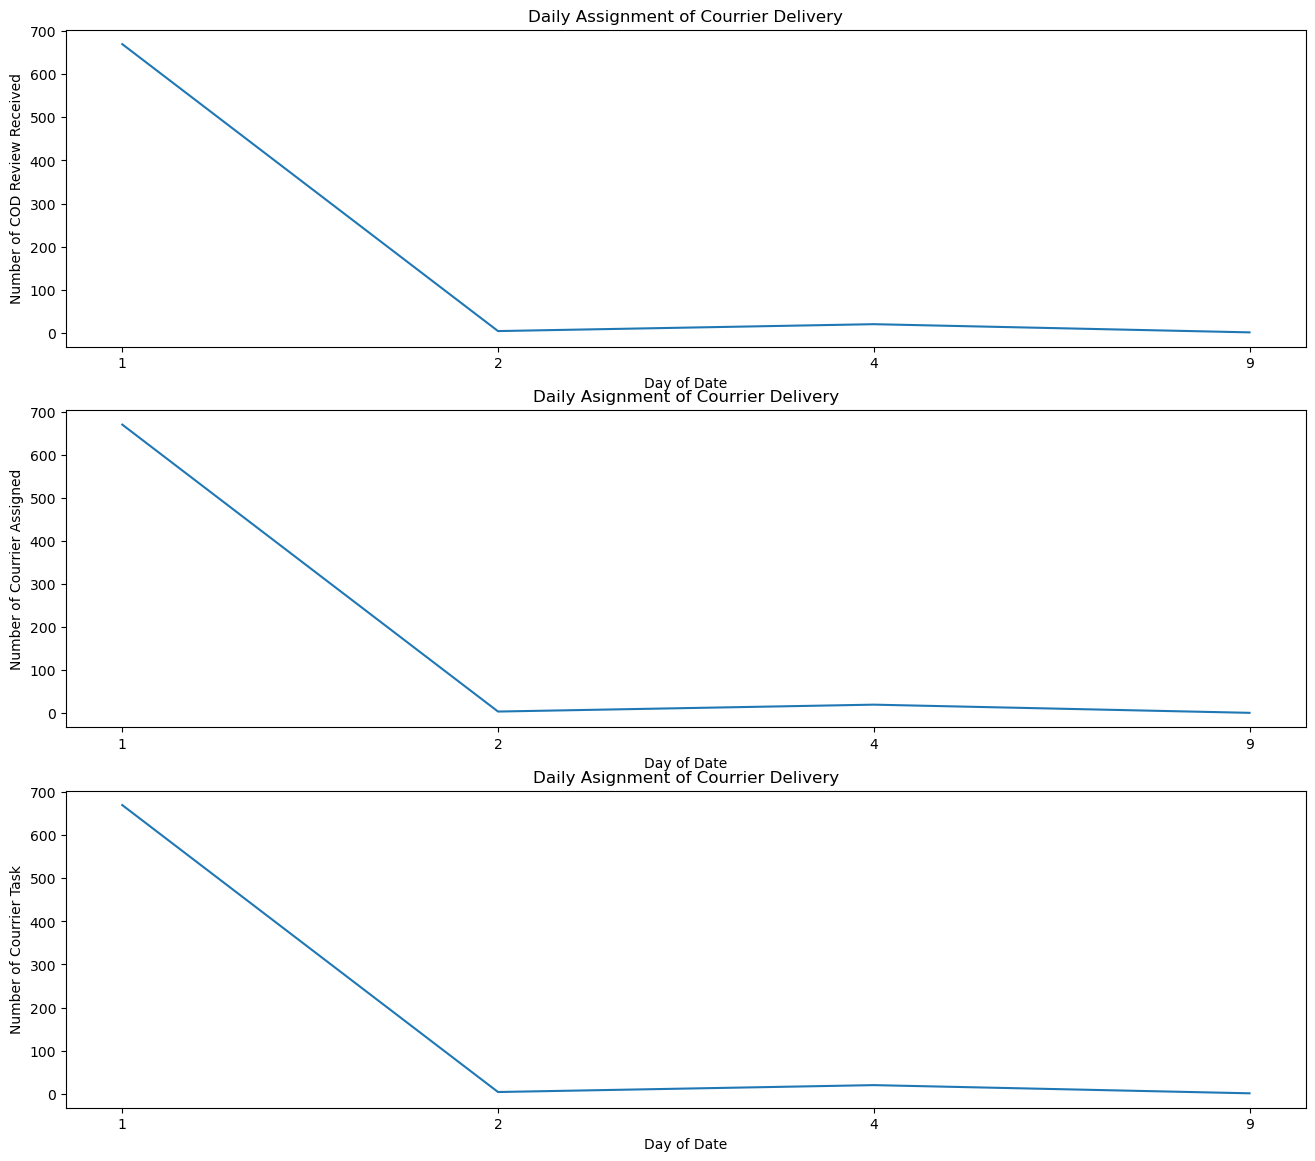

In [22]:
# groupby 'task_created_year', 'task_created_month', 'task_created_day' by 
eda1_created = df_eda1.groupby(['task_created_day'])[['cod_received','task_assign_to', 'task_id']].count().reset_index() 

# plt.figure(figsize=(12,6))
fig, axes = plt.subplots(3, 1, figsize=(16,14))
sns.lineplot(data=eda1_created, x='task_created_day', y='cod_received', ax=axes[0]) 
axes[0].set_title('Daily Assignment of Courrier Delivery')
axes[0].set_xlabel('Day of Date')
axes[0].set_ylabel('Number of COD Review Received')

sns.lineplot(data=eda1_created, x='task_created_day', y='task_assign_to', ax=axes[1])
axes[1].set_title('Daily Asignment of Courrier Delivery')
axes[1].set_xlabel('Day of Date')
axes[1].set_ylabel('Number of Courrier Assigned')

sns.lineplot(data=eda1_created, x='task_created_day', y='task_id', ax=axes[2])
axes[2].set_title('Daily Asignment of Courrier Delivery')
axes[2].set_xlabel('Day of Date')
axes[2].set_ylabel('Number of Courrier Task')

plt.show()

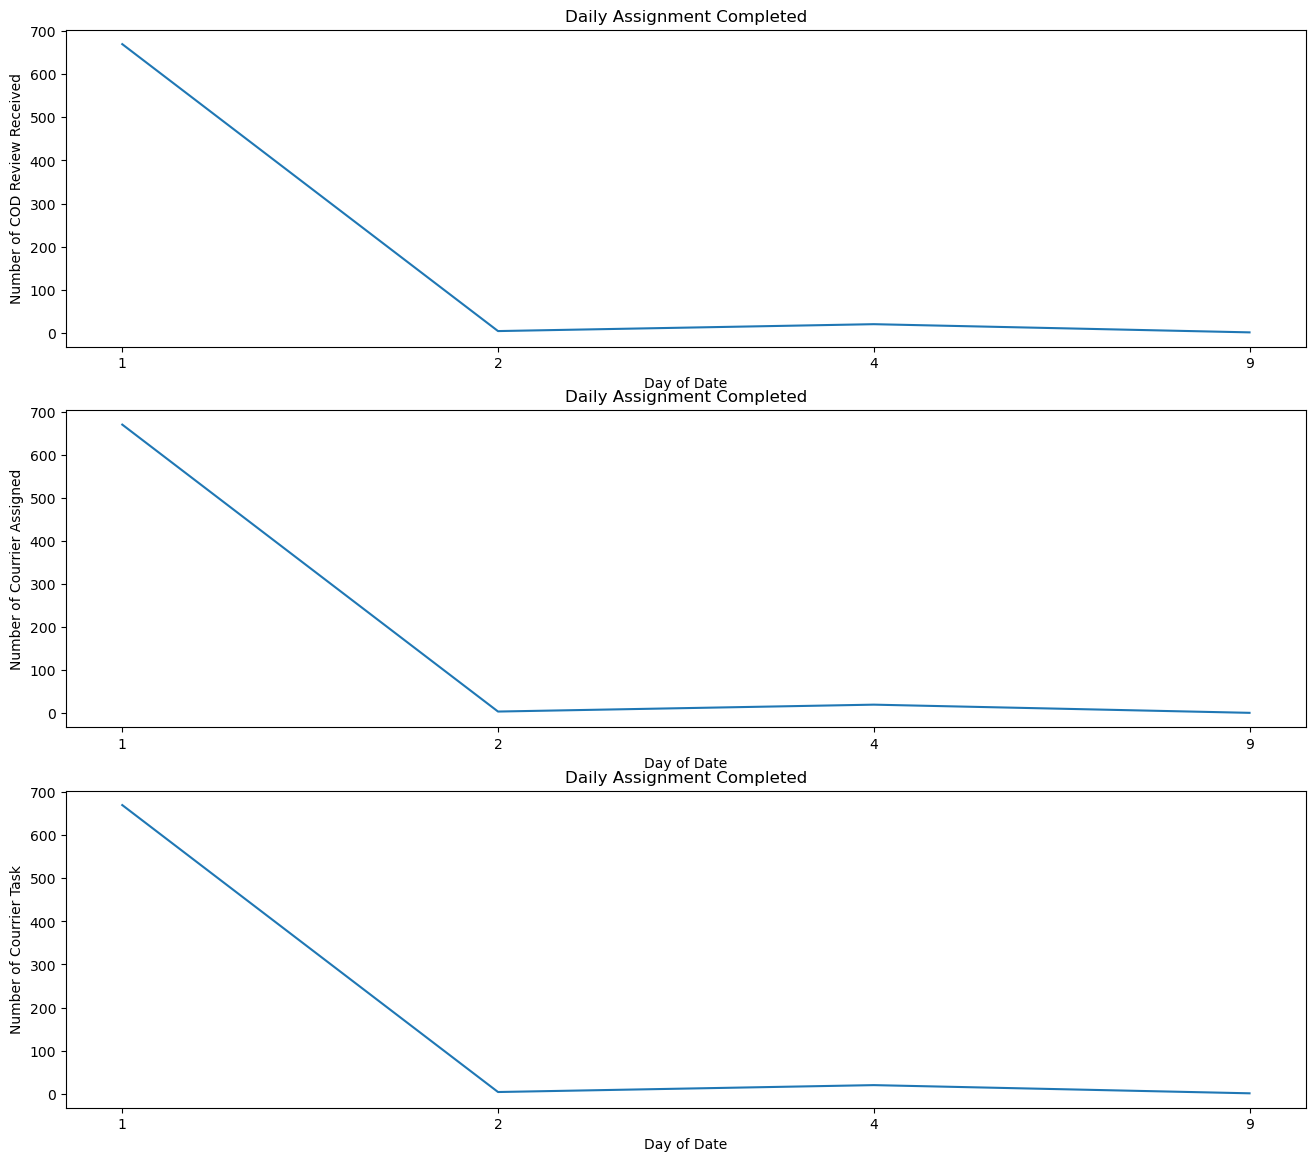

In [23]:
# groupby 'task_completed_year', 'task_completed_month', 'task_completed_day' by
eda1_completed = df_eda1.groupby(['task_completed_day'])[['cod_received','task_assign_to', 'task_id']].count().reset_index()

# plt.figure(figsize=(12,6))
fig, axes = plt.subplots(3, 1, figsize=(16,14))
sns.lineplot(data=eda1_completed, x='task_completed_day', y='cod_received', ax=axes[0]) 
axes[0].set_title('Daily Assignment Completed')
axes[0].set_xlabel('Day of Date')
axes[0].set_ylabel('Number of COD Review Received')

sns.lineplot(data=eda1_completed, x='task_completed_day', y='task_assign_to', ax=axes[1])
axes[1].set_title('Daily Assignment Completed')
axes[1].set_xlabel('Day of Date')
axes[1].set_ylabel('Number of Courrier Assigned')

sns.lineplot(data=eda1_completed, x='task_completed_day', y='task_id', ax=axes[2])
axes[2].set_title('Daily Assignment Completed')
axes[2].set_xlabel('Day of Date')
axes[2].set_ylabel('Number of Courrier Task')

plt.show()

In [10]:
# yang belum di review dan tidak berhasil terkirim
df_eda2 = df_sample[~(df_sample['cod_received']==True) & ~(df_sample['user_tasks_label']=='Success') ]
df_eda2

,task_longitude_done,task_lattitude_done,task_created_time,cod_amount,cod_received,task_assign_to,task_completed_time,task_status,flow,task_id,...,user_detail_status,user_items_weight,user_branch_origin,user_task_status,task_created_year,task_created_month,task_created_day,task_completed_year,task_completed_month,task_completed_day
680,0.000000,0.000000,2022-11-02 01:06:34,0.0,False,vengefulCheese4,2022-01-01 00:00:00,ongoing,Delivery,0bed2d5cd82456af0239,...,Unknown,1.00,CGK,COLF02,2022,11,2,2022,1,1
681,135.504418,-3.378995,2022-11-02 00:13:17,284000.0,False,annoyedHare4,2022-11-02 01:06:31,done,Delivery,8803927e7397c68edc83,...,U01,1.00,CGK,COLF02,2022,11,2,2022,11,2
683,111.330660,-8.203650,2022-11-02 01:04:47,27404.0,False,cheerfulCoconut9,2022-11-02 01:06:32,done,Delivery,55742f0c5c64a8f2da48,...,U12,0.14,CGK,COLF02,2022,11,2,2022,11,2
684,0.000000,0.000000,2022-11-02 01:06:34,0.0,False,vengefulCheese4,2022-01-01 00:00:00,ongoing,Delivery,3e9117e0d978e79e02e9,...,Unknown,1.00,MES,COLF02,2022,11,2,2022,1,1
685,0.000000,0.000000,2022-11-02 01:06:34,550000.0,False,vengefulCheese4,2022-01-01 00:00:00,ongoing,Delivery,898eb4f04d5eb328ed94,...,Unknown,1.00,SOC,COLF02,2022,11,2,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8309,106.859971,-6.677038,2022-11-10 02:36:24,80499.0,False,amusedMagpie2,2022-11-10 02:37:58,done,Delivery,df65494d42a5bfacd3e7,...,U05,2.00,CGK,COLF02,2022,11,10,2022,11,10
8310,0.000000,0.000000,2022-11-10 02:00:47,0.0,False,superiorCardinal0,2022-11-10 02:31:03,done,Delivery,a98b2c3de07b3eb0185c,...,U12,0.50,CGK,COLF02,2022,11,10,2022,11,10
8323,98.736924,3.536418,2022-11-10 01:56:48,0.0,False,giddyShads0,2022-11-10 02:37:58,done,Delivery,abb2cc73275d23947762,...,U01,1.00,MES,COLF02,2022,11,10,2022,11,10
8330,110.352054,-7.892571,2022-11-10 02:21:42,0.0,False,murkyThrushe3,2022-11-10 02:37:52,done,Delivery,5cc952d9e9f8066dbf24,...,U01,1.00,TGR,COLF02,2022,11,10,2022,11,10


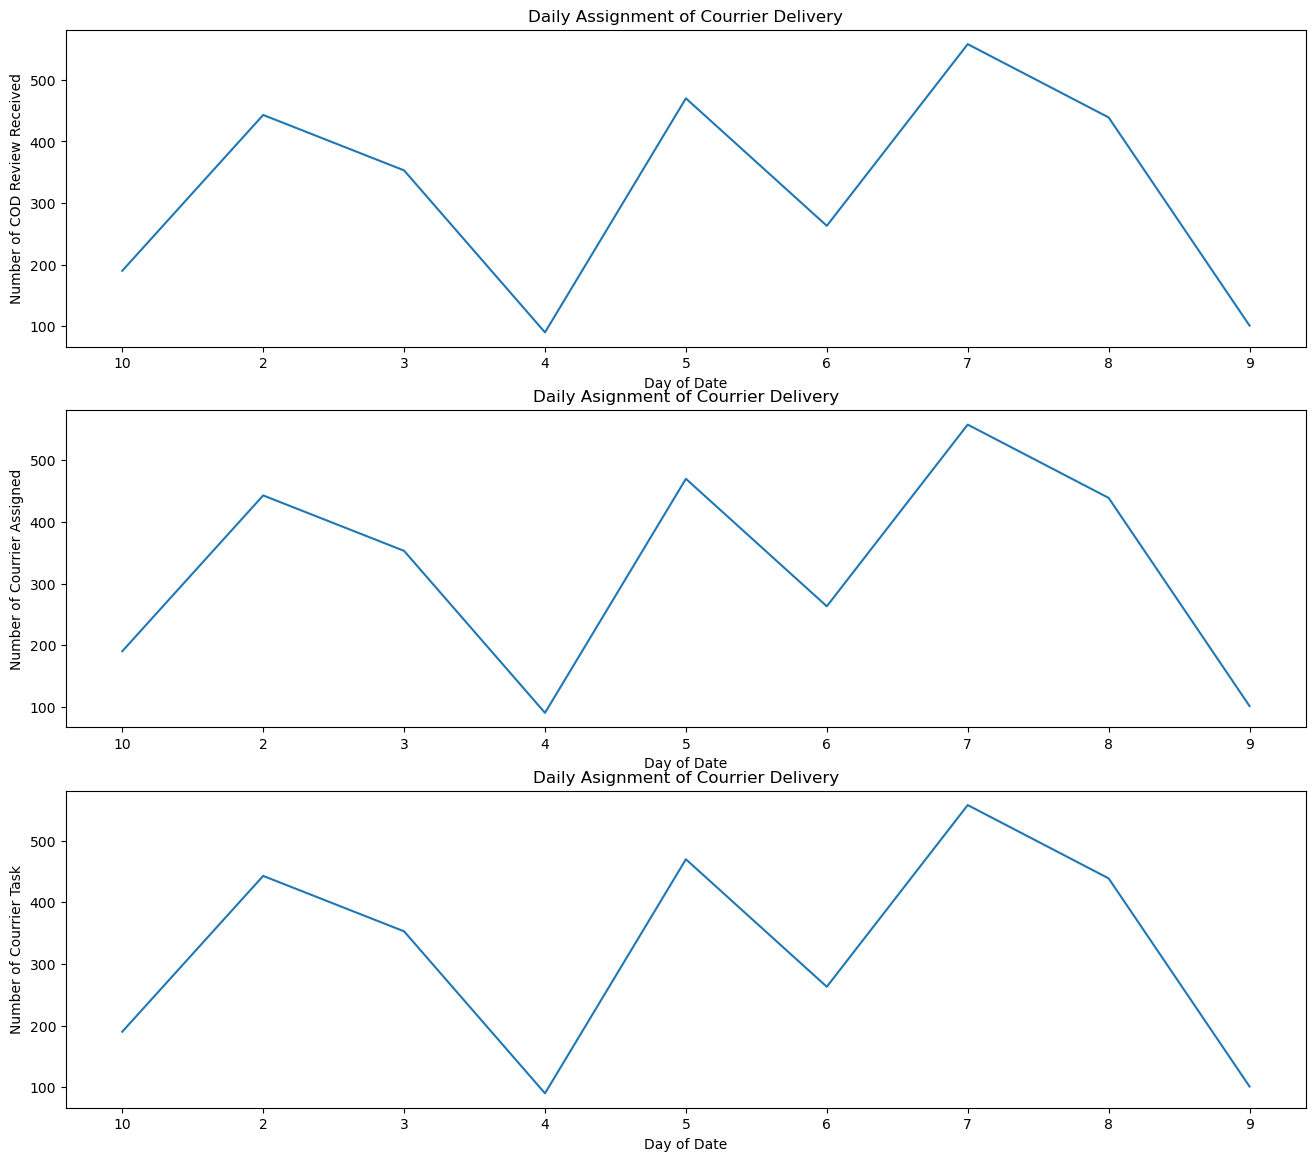

In [24]:
# groupby 'task_created_day' by
eda2_created = df_eda2.groupby(['task_created_day'])[['cod_received','task_assign_to', 'task_id']].count().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(16,14))
sns.lineplot(data=eda2_created, x='task_created_day', y='cod_received', ax=axes[0]) 
axes[0].set_title('Daily Assignment of Courrier Delivery')
axes[0].set_xlabel('Day of Date')
axes[0].set_ylabel('Number of COD Review Received')

sns.lineplot(data=eda2_created, x='task_created_day', y='task_assign_to', ax=axes[1])
axes[1].set_title('Daily Asignment of Courrier Delivery')
axes[1].set_xlabel('Day of Date')
axes[1].set_ylabel('Number of Courrier Assigned')

sns.lineplot(data=eda2_created, x='task_created_day', y='task_id', ax=axes[2])
axes[2].set_title('Daily Asignment of Courrier Delivery')
axes[2].set_xlabel('Day of Date')
axes[2].set_ylabel('Number of Courrier Task')

plt.show()

<Figure size 1200x600 with 0 Axes>

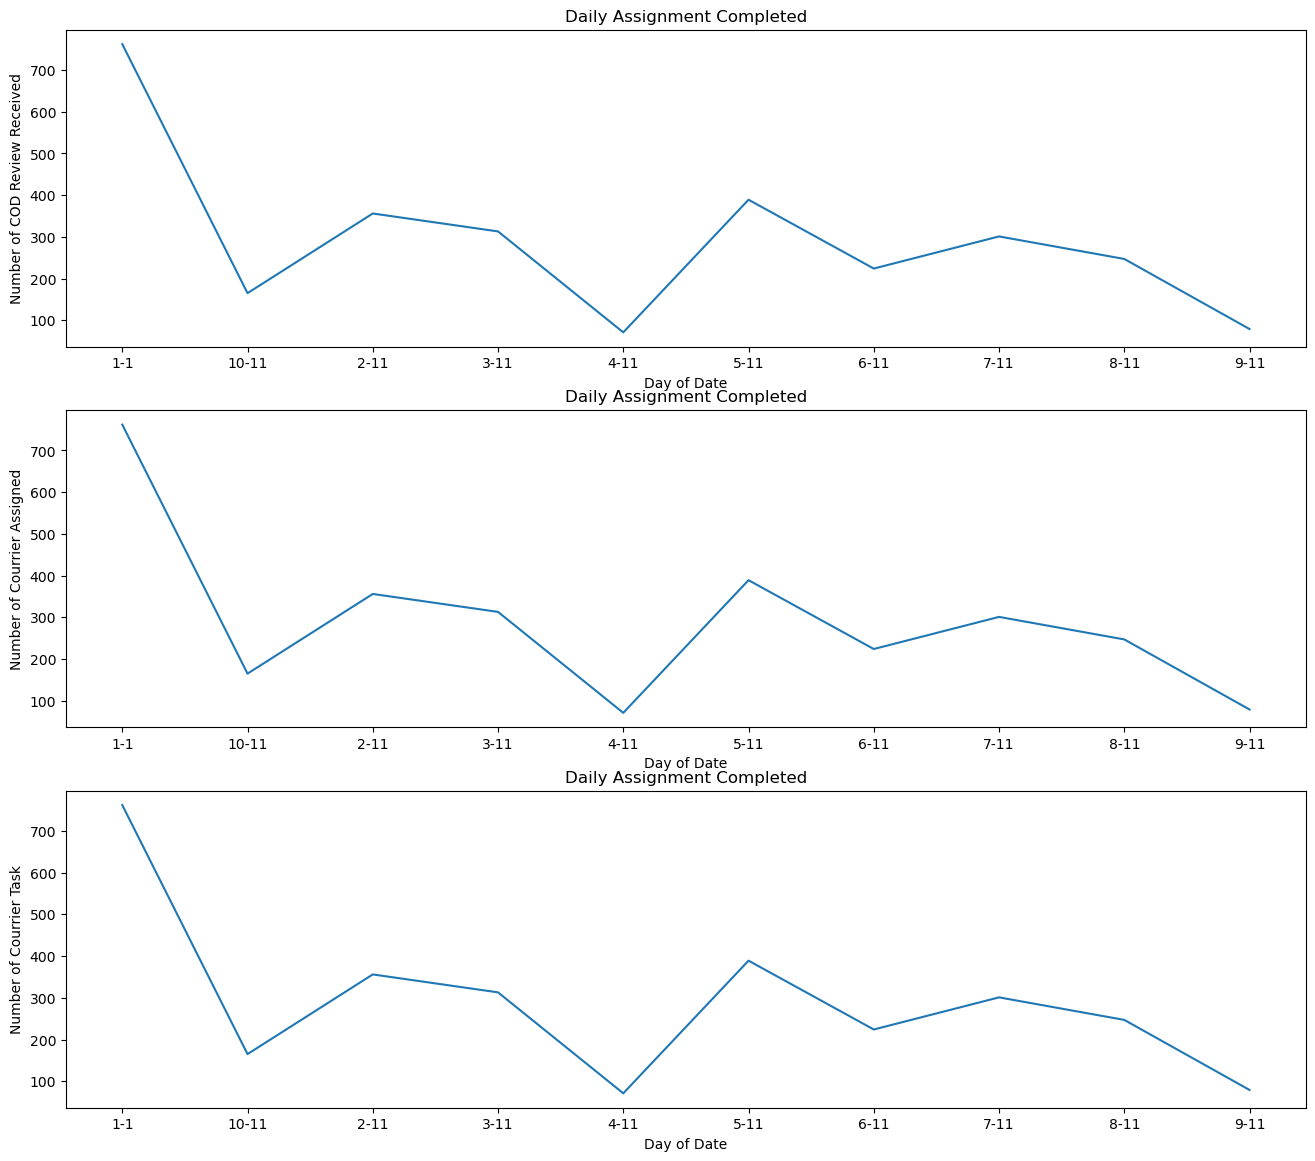

In [29]:
# groupby 'task_created_month', 'task_created_day' by
eda2_completed = df_eda2.groupby(['task_completed_month','task_completed_day'])[['cod_received','task_assign_to', 'task_id']].count().reset_index()
eda2_completed['day_month_complete'] = eda2_completed['task_completed_day'].map(str) + '-' + eda2_completed['task_completed_month'].map(str)

plt.figure(figsize=(12,6))
fig, axes = plt.subplots(3, 1, figsize=(16,14))
sns.lineplot(data=eda2_completed, x='day_month_complete', y='cod_received', ax=axes[0]) 
axes[0].set_title('Daily Assignment Completed')
axes[0].set_xlabel('Day of Date')
axes[0].set_ylabel('Number of COD Review Received')

sns.lineplot(data=eda2_completed, x='day_month_complete', y='task_assign_to', ax=axes[1])
axes[1].set_title('Daily Assignment Completed')
axes[1].set_xlabel('Day of Date')
axes[1].set_ylabel('Number of Courrier Assigned')

sns.lineplot(data=eda2_completed, x='day_month_complete', y='task_id', ax=axes[2])
axes[2].set_title('Daily Assignment Completed')
axes[2].set_xlabel('Day of Date')
axes[2].set_ylabel('Number of Courrier Task')

plt.show()

In [11]:
# cod yang sudah di review dan belum berhasil terkirim
# df_sample[(df_sample['cod_received']==True) & ~(df_sample['user_tasks_label']=='Success')] <-- KOSONG & NO ROWS

# cod yang belum di review namun sudah berhasil terkirim
df_eda3 = df_sample[~(df_sample['cod_received']==True) & (df_sample['user_tasks_label']=='Success')]
df_eda3

,task_longitude_done,task_lattitude_done,task_created_time,cod_amount,cod_received,task_assign_to,task_completed_time,task_status,flow,task_id,...,user_detail_status,user_items_weight,user_branch_origin,user_task_status,task_created_year,task_created_month,task_created_day,task_completed_year,task_completed_month,task_completed_day
73,98.814915,1.713917,2022-11-01 02:31:32,0.0,False,enragedLlama3,2022-11-01 06:14:31,done,Delivery,b7f9f3f96def6b866166,...,D01,1.00,MES,COLF01,2022,11,1,2022,11,1
550,0.000000,0.000000,2022-11-01 08:04:06,0.0,False,mildCardinal0,2022-01-01 00:00:00,done,Delivery,9779ae5b5f88ba0bf31c,...,D01,3.00,CGK,COLF01,2022,11,1,2022,1,1
551,0.000000,0.000000,2022-11-01 09:59:58,0.0,False,mildCardinal0,2022-01-01 00:00:00,done,Delivery,8ade827b1e3530c02e82,...,D01,4.90,CGK,COLF01,2022,11,1,2022,1,1
552,0.000000,0.000000,2022-11-01 09:59:58,0.0,False,mildCardinal0,2022-01-01 00:00:00,done,Delivery,292b1e9f73099dac1209,...,D01,8.00,CGK,COLF01,2022,11,1,2022,1,1
553,0.000000,0.000000,2022-11-01 09:59:58,0.0,False,mildCardinal0,2022-01-01 00:00:00,done,Delivery,7e8862b3f4010465f006,...,D01,17.00,BDO,COLF01,2022,11,1,2022,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8327,101.438664,0.479580,2022-11-10 00:27:51,0.0,False,dearWhiting2,2022-11-10 02:38:02,done,Delivery,4df98016923e193d39ec,...,D01,1.00,CGK,COLF01,2022,11,10,2022,11,10
8328,0.000000,0.000000,2022-11-10 00:46:14,0.0,False,emptyPretzels3,2022-11-10 02:37:50,done,Delivery,469a6678ea253784e7e3,...,D02,1.00,CGK,COLF01,2022,11,10,2022,11,10
8329,0.000000,0.000000,2022-11-10 02:07:12,0.0,False,debonairPonie1,2022-11-10 02:38:04,done,Delivery,501af4e040a742e9e878,...,D10,1.00,CGK,COLF01,2022,11,10,2022,11,10
8331,105.664897,-5.359063,2022-11-10 02:36:44,0.0,False,enragedCake7,2022-11-10 02:37:55,done,Delivery,1b136b5a3c60749eb571,...,D01,1.44,CGK,COLF01,2022,11,10,2022,11,10


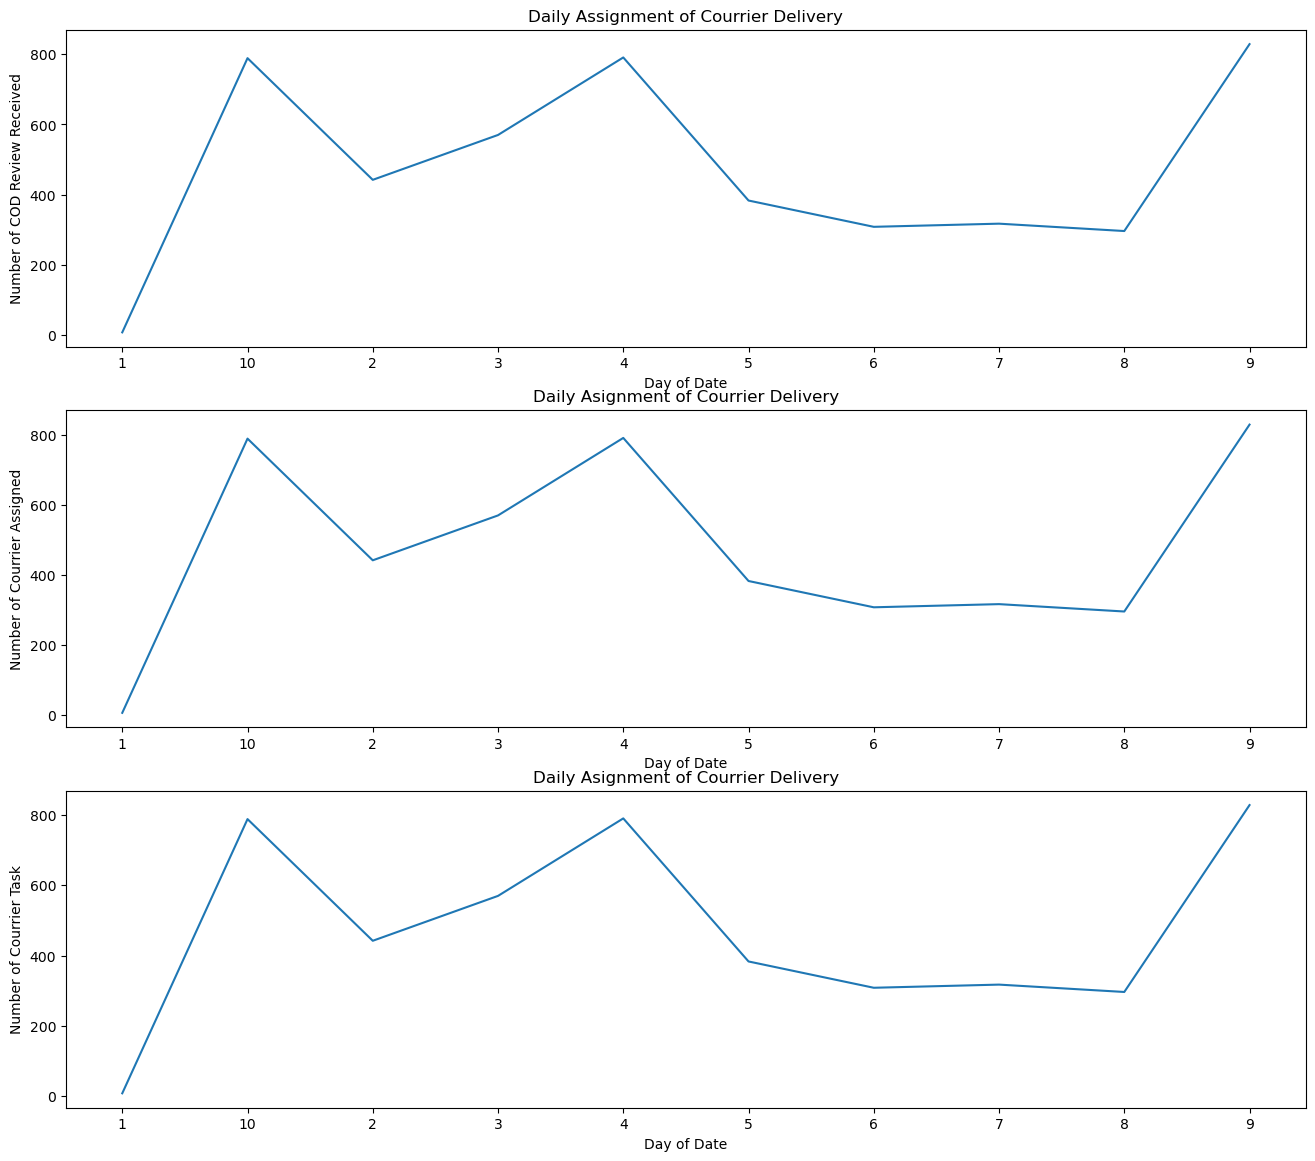

In [25]:
# groupby 'task_created_day' by
eda3_created = df_eda3.groupby(['task_created_day'])[['cod_received','task_assign_to', 'task_id']].count().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(16,14))
sns.lineplot(data=eda3_created, x='task_created_day', y='cod_received', ax=axes[0]) 
axes[0].set_title('Daily Assignment of Courrier Delivery')
axes[0].set_xlabel('Day of Date')
axes[0].set_ylabel('Number of COD Review Received')

sns.lineplot(data=eda3_created, x='task_created_day', y='task_assign_to', ax=axes[1])
axes[1].set_title('Daily Asignment of Courrier Delivery')
axes[1].set_xlabel('Day of Date')
axes[1].set_ylabel('Number of Courrier Assigned')

sns.lineplot(data=eda3_created, x='task_created_day', y='task_id', ax=axes[2])
axes[2].set_title('Daily Asignment of Courrier Delivery')
axes[2].set_xlabel('Day of Date')
axes[2].set_ylabel('Number of Courrier Task')

plt.show()

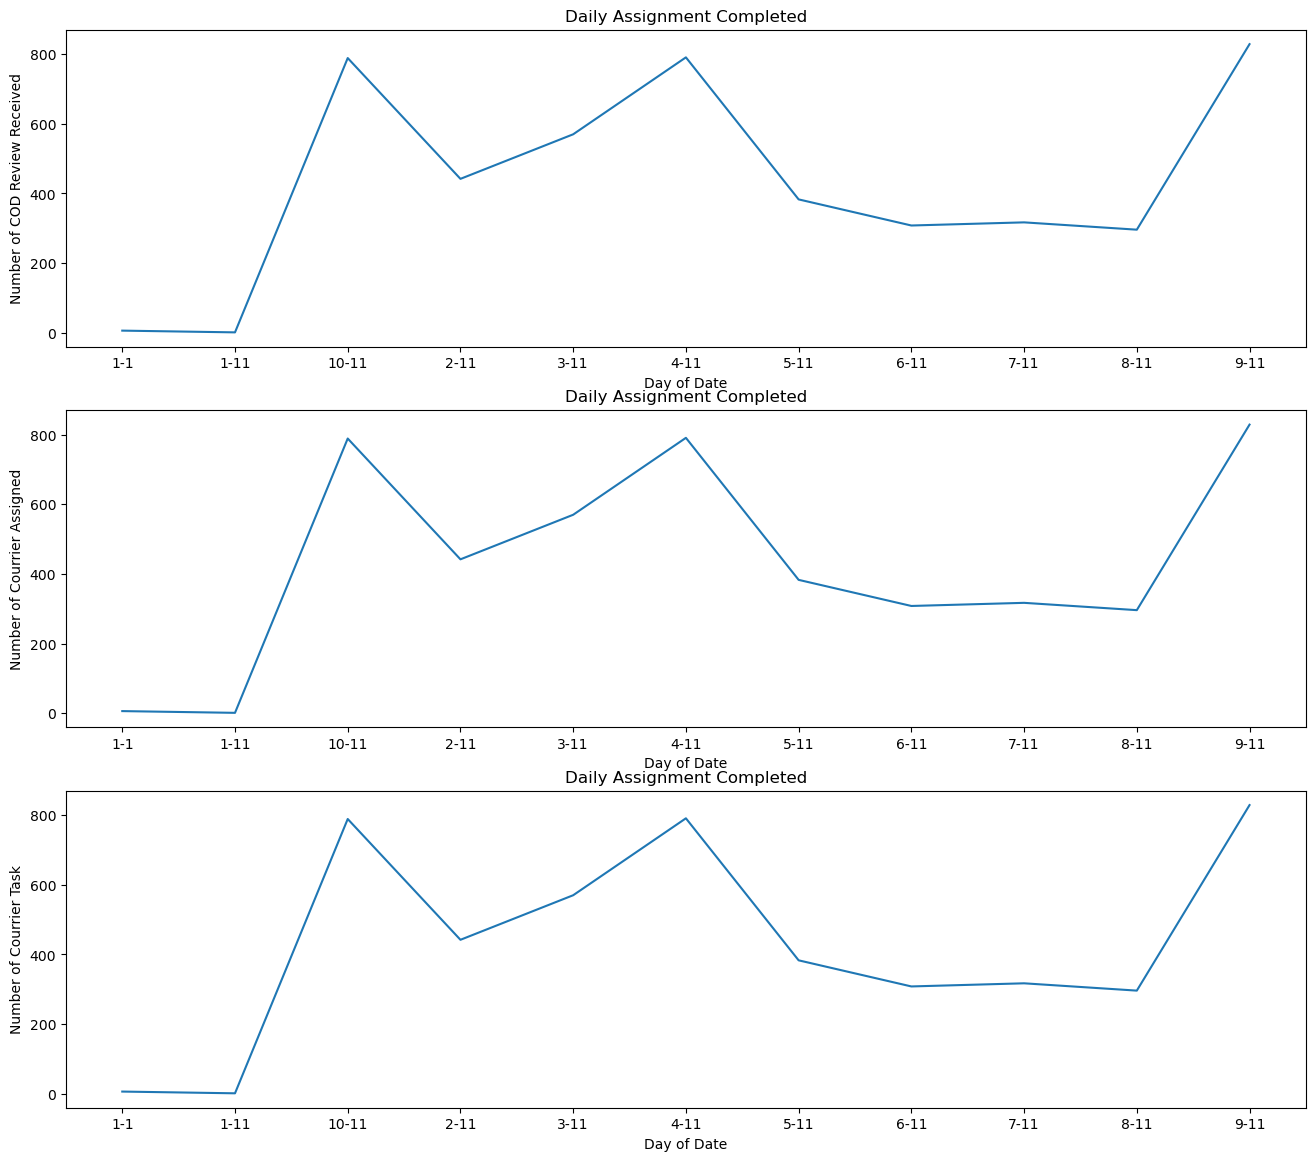

In [31]:
# groupby 'task_created_month', 'task_created_day' by
eda3_complete = df_eda3.groupby(['task_completed_month','task_completed_day'])[['cod_received','task_assign_to', 'task_id']].count().reset_index()
eda3_complete['day_month_complete'] = eda3_complete['task_completed_day'].map(str) + '-' + eda3_complete['task_completed_month'].map(str)

fig, axes = plt.subplots(3, 1, figsize=(16,14))
sns.lineplot(data=eda3_complete, x='day_month_complete', y='cod_received', ax=axes[0]) 
axes[0].set_title('Daily Assignment Completed')
axes[0].set_xlabel('Day of Date')
axes[0].set_ylabel('Number of COD Review Received')

sns.lineplot(data=eda3_complete, x='day_month_complete', y='task_assign_to', ax=axes[1])
axes[1].set_title('Daily Assignment Completed')
axes[1].set_xlabel('Day of Date')
axes[1].set_ylabel('Number of Courrier Assigned')

sns.lineplot(data=eda3_complete, x='day_month_complete', y='task_id', ax=axes[2])
axes[2].set_title('Daily Assignment Completed')
axes[2].set_xlabel('Day of Date')
axes[2].set_ylabel('Number of Courrier Task')

plt.show()

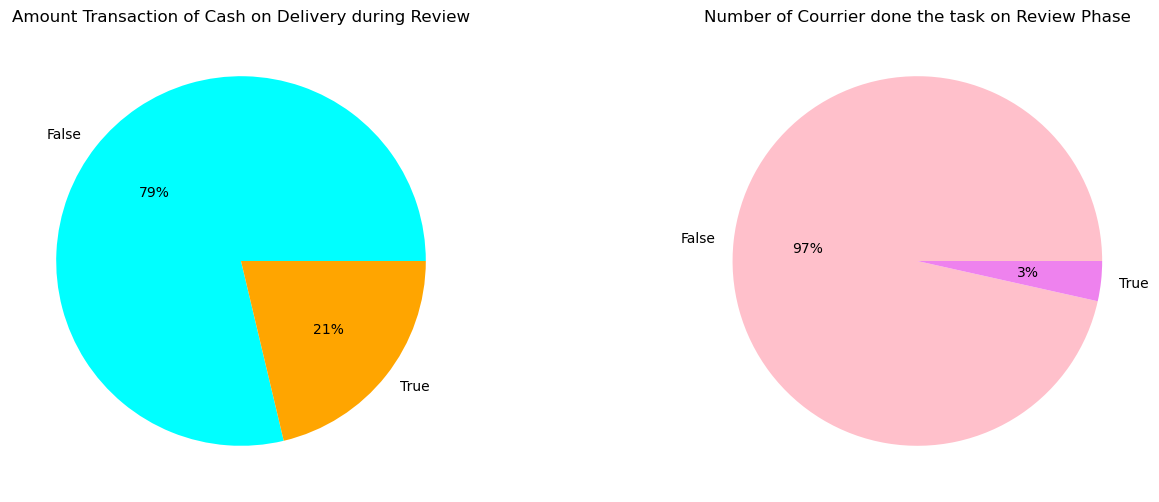

In [43]:
# groupby cod_received by task_assign_to count --> cod_reviewed_assign
# display(df_sample.groupby('cod_received')['cod_received'].count())
# groupby cod_received by cod_amount sum --> cod_reviewed_amount
cod_reviewed_amount = df_sample.groupby('cod_received')['cod_amount'].sum().reset_index()

# groupby cod_received by task_assign_to count --> cod_reviewed_assignto
cod_reviewed_assignto = df_sample.groupby('cod_received')['task_assign_to'].nunique().reset_index()

fig = plt.figure(figsize=(16,6))

# left pie chart
pie1 = fig.add_subplot(121)
pie1.pie(cod_reviewed_amount['cod_amount'], labels=cod_reviewed_amount['cod_received'], autopct='%.0f%%', colors=('cyan','orange'))
plt.title('Amount Transaction of Cash on Delivery during Review')

# right pie chart
pie2 = fig.add_subplot(122)
pie2.pie(cod_reviewed_assignto['task_assign_to'], labels=cod_reviewed_assignto['cod_received'], autopct='%.0f%%', colors=('pink','violet'))
plt.title('Number of Courrier done the task on Review Phase')

plt.show()

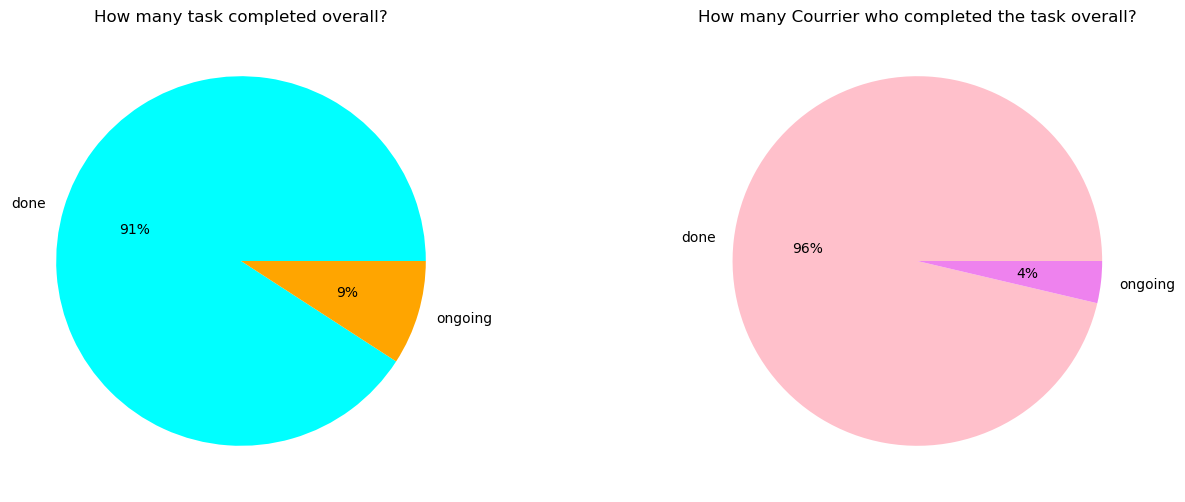

In [44]:
# # groupby task_status by count
# display(df_sample.groupby('task_status')['task_status'].count())
# groupby task_status by task_id count --> task_status_id
task_status_id = df_sample.groupby('task_status')['task_id'].nunique().reset_index()
# groupby task_status by task_assign_to count --> task_status_assignto
task_status_assignto = df_sample.groupby('task_status')['task_assign_to'].nunique().reset_index()

fig = plt.figure(figsize=(16,6))

# left pie chart
pie1 = fig.add_subplot(121)
pie1.pie(task_status_id['task_id'], labels=task_status_id['task_status'], autopct='%.0f%%', colors=('cyan','orange'))
plt.title('How many task completed overall?')

# right pie chart
pie2 = fig.add_subplot(122)
pie2.pie(task_status_assignto['task_assign_to'], labels=task_status_assignto['task_status'], autopct='%.0f%%', colors=('pink','violet'))
plt.title('How many Courrier who completed the task overall?')

plt.show()

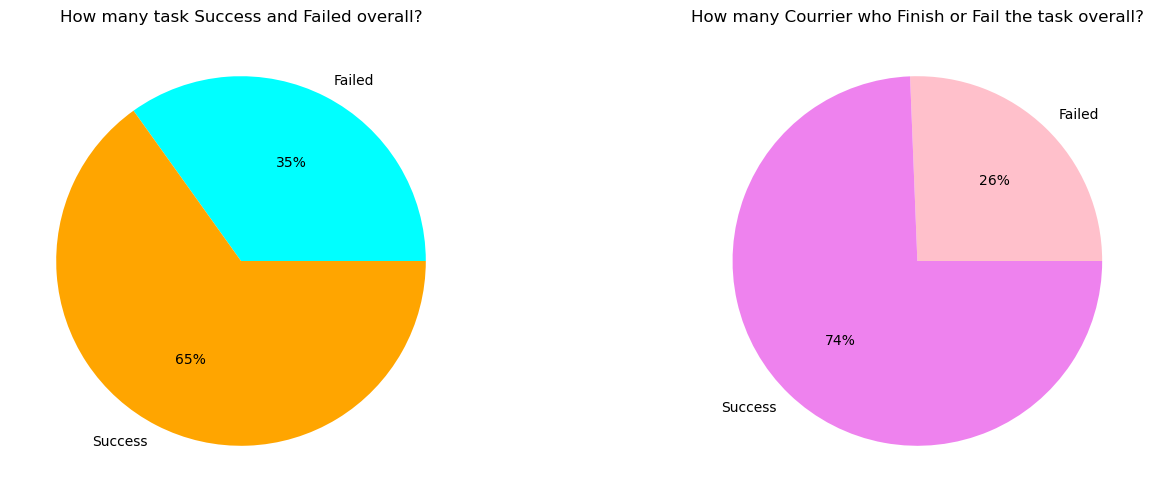

In [49]:
# groupby user_tasks_label and user_task_status by count
# display(df_sample.groupby('user_tasks_label')['user_tasks_label'].count())
# groupny user_tasks_label and user_task_status by task_id count  --> task_labelstat_id
task_labelstat_id = df_sample.groupby(['user_tasks_label','user_task_status'])['task_id'].nunique().reset_index()

# groupby user_tasks_label and user_task_status by task_assign_to count --> task_labelstat_assignto
task_labelstat_assignto = df_sample.groupby(['user_tasks_label','user_task_status'])['task_assign_to'].nunique().reset_index()

fig = plt.figure(figsize=(16,6))

# left pie chart
pie1 = fig.add_subplot(121)
pie1.pie(task_labelstat_id['task_id'], labels=task_labelstat_id['user_tasks_label'], autopct='%.0f%%', colors=('cyan','orange'))
plt.title('How many task Success and Failed overall?')

# right pie chart
pie2 = fig.add_subplot(122)
pie2.pie(task_labelstat_assignto['task_assign_to'], labels=task_labelstat_assignto['user_tasks_label'], autopct='%.0f%%', colors=('pink','violet'))
plt.title('How many Courrier who Finish or Fail the task overall?')

plt.show()

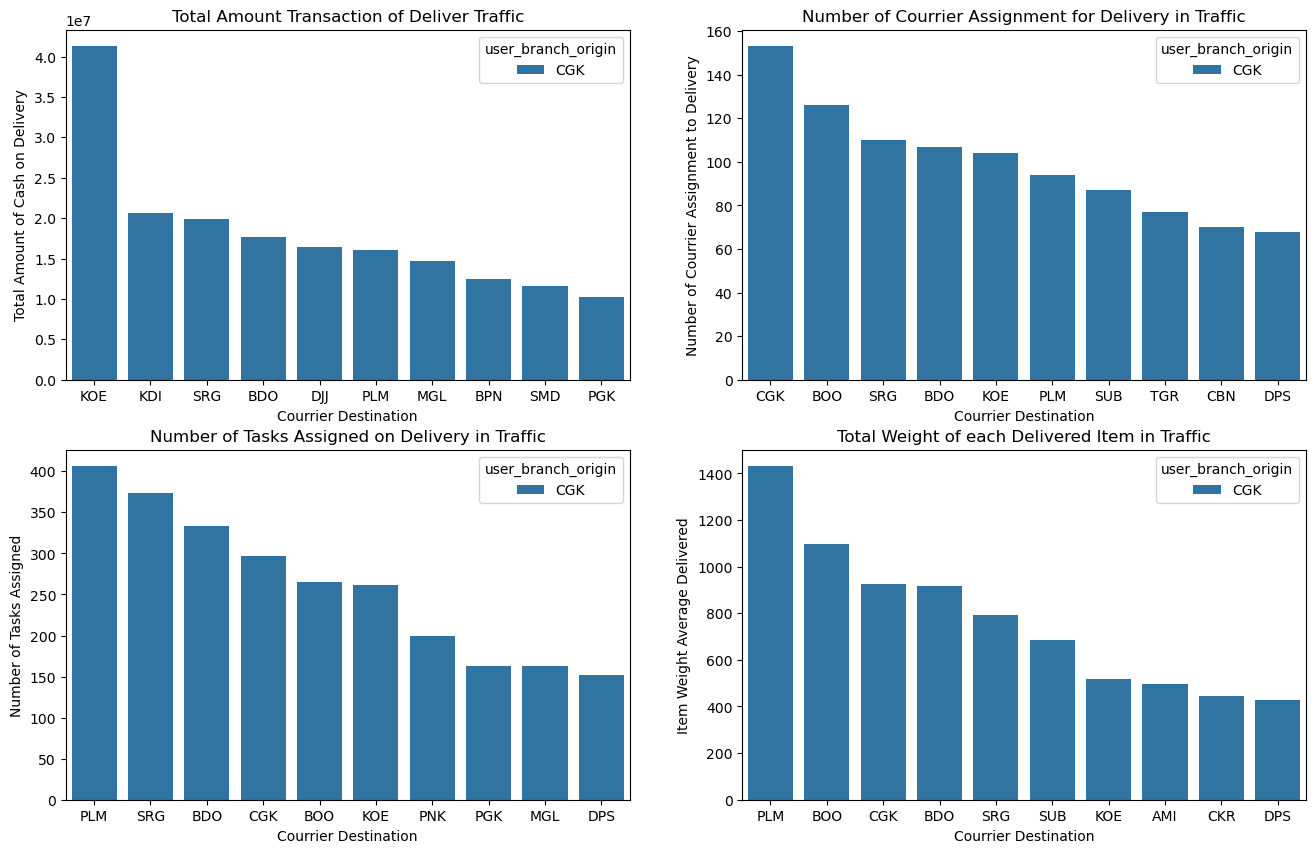

In [53]:
# groupby user_branch_dest, user_branch_origin by cod_amount sum --> branch_amount
branch_amount = df_sample.groupby(['user_branch_dest','user_branch_origin'])['cod_amount'].sum().reset_index()

# groupby user_branch_dest, user_branch_origin by task_assign_to count --> branch_assign
branch_assign = df_sample.groupby(['user_branch_dest','user_branch_origin'])['task_assign_to'].nunique().reset_index()

# groupby user_branch_dest, user_branch_origin by task_id count --> branch_taskid
branch_taskid = df_sample.groupby(['user_branch_dest','user_branch_origin'])['task_id'].nunique().reset_index()

# groupby user_branch_dest, user_branch_origin by user_items_weight sum --> branch_weight
branch_weight = df_sample.groupby(['user_branch_dest','user_branch_origin'])['user_items_weight'].sum().reset_index()

# plt.figure(figsize=(12,6))
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.barplot(data=branch_amount.sort_values(by='cod_amount', ascending=False).head(10), x='user_branch_dest', 
            y='cod_amount', hue='user_branch_origin', ax=axes[0,0]) # 
axes[0,0].set_title('Total Amount Transaction of Deliver Traffic')
axes[0,0].set_xlabel('Courrier Destination')
axes[0,0].set_ylabel('Total Amount of Cash on Delivery')

sns.barplot(data=branch_assign.sort_values(by='task_assign_to', ascending=False).head(10), x='user_branch_dest', 
            y='task_assign_to', hue='user_branch_origin', ax=axes[0,1]) # 
axes[0,1].set_title('Number of Courrier Assignment for Delivery in Traffic')
axes[0,1].set_xlabel('Courrier Destination')
axes[0,1].set_ylabel('Number of Courrier Assignment to Delivery')

sns.barplot(data=branch_taskid.sort_values(by='task_id', ascending=False).head(10), x='user_branch_dest', 
            y='task_id', hue='user_branch_origin', ax=axes[1,0]) # 
axes[1,0].set_title('Number of Tasks Assigned on Delivery in Traffic')
axes[1,0].set_xlabel('Courrier Destination')
axes[1,0].set_ylabel('Number of Tasks Assigned')

sns.barplot(data=branch_weight.sort_values(by='user_items_weight', ascending=False).head(10), x='user_branch_dest', 
            y='user_items_weight', hue='user_branch_origin', ax=axes[1,1]) # 
axes[1,1].set_title('Total Weight of each Delivered Item in Traffic')
axes[1,1].set_xlabel('Courrier Destination')
axes[1,1].set_ylabel('Item Weight Average Delivered')

plt.show()

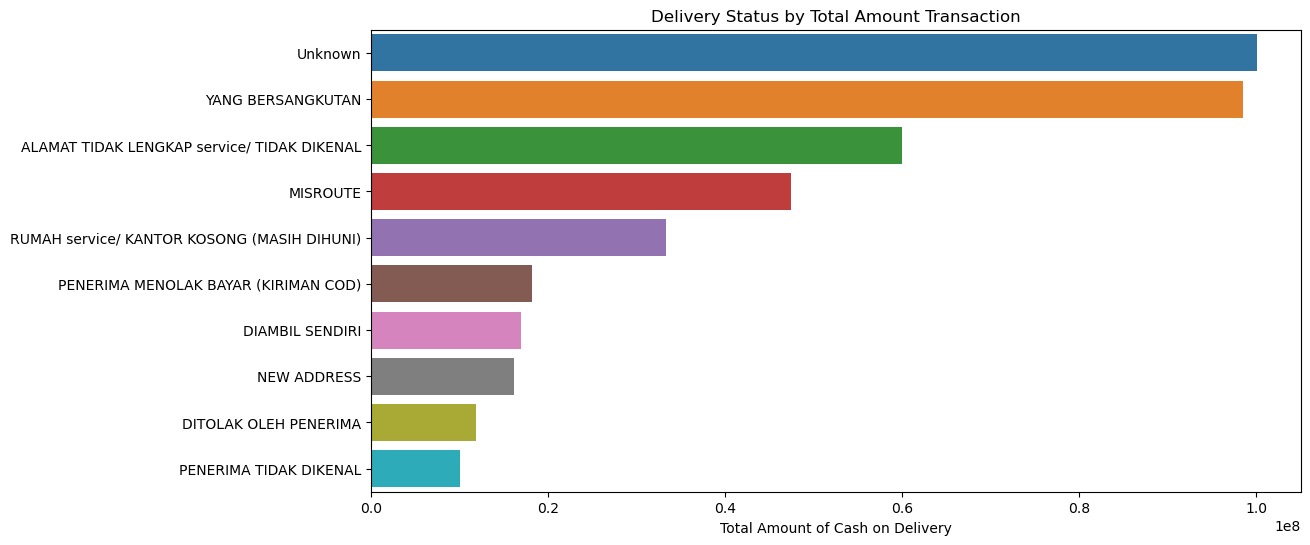

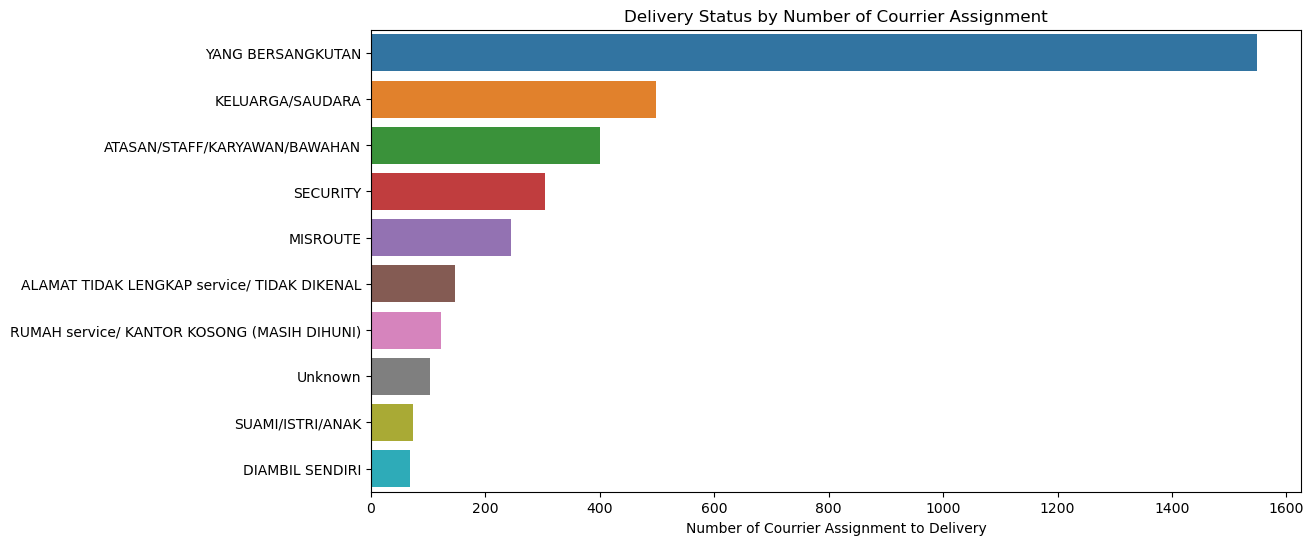

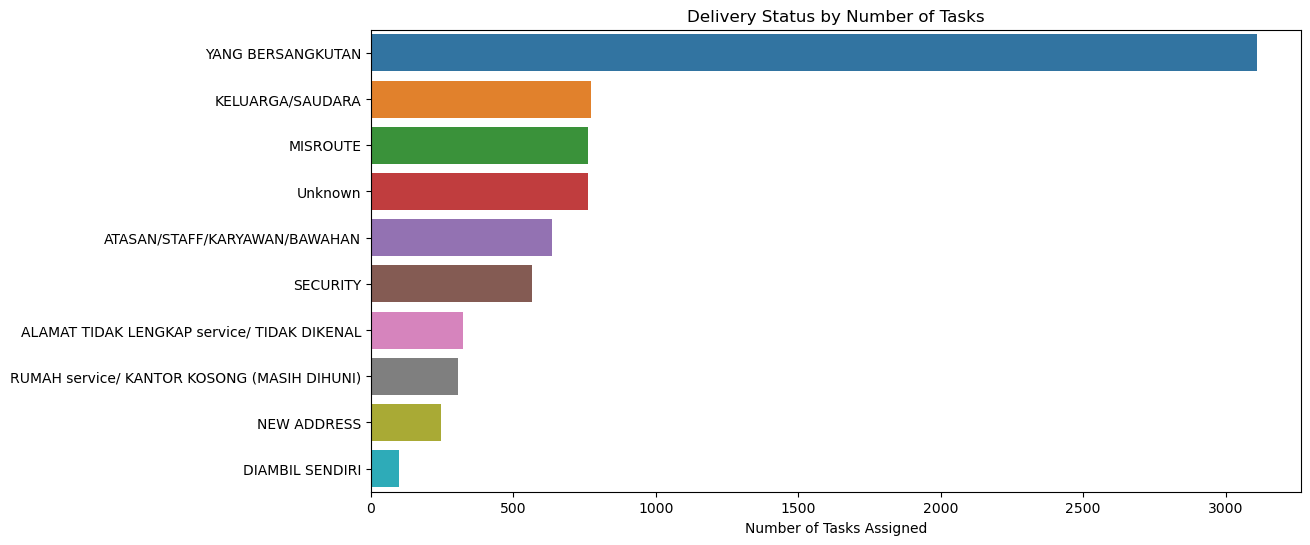

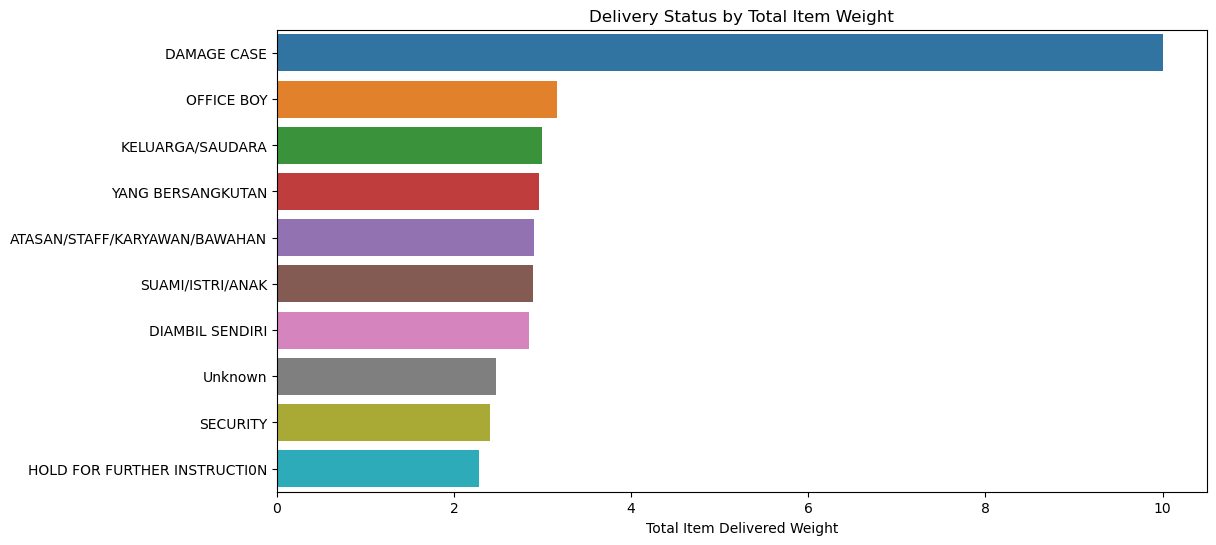

In [54]:
# groupby user_detaillabel, user_detail_status by cod_amount sum --> user_detail_amount
user_detail_amount = df_sample.groupby(['user_detaillabel','user_detail_status'])['cod_amount'].sum().reset_index()

# groupby user_detaillabel, user_detail_status by task_assign_to count --> user_detail_assignto
user_detail_assignto = df_sample.groupby(['user_detaillabel','user_detail_status'])['task_assign_to'].nunique().reset_index()

# groupby user_detaillabel, user_detail_status by task_id count --> user_detail_task
user_detail_task = df_sample.groupby(['user_detaillabel','user_detail_status'])['task_id'].nunique().reset_index()

# groupby user_branch_dest, user_branch_origin by user_items_weight sum --> user_detail_weight
user_detail_weight = df_sample.groupby(['user_detaillabel','user_detail_status'])['user_items_weight'].mean().reset_index()

plt.figure(figsize=(12,6))
# fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.barplot(data=user_detail_amount.sort_values(by='cod_amount', ascending=False).head(10), 
            x='cod_amount', y='user_detaillabel') 
plt.title('Delivery Status by Total Amount Transaction')
plt.xlabel('Total Amount of Cash on Delivery')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=user_detail_assignto.sort_values(by='task_assign_to', ascending=False).head(10), 
            x='task_assign_to', y='user_detaillabel') 
plt.title('Delivery Status by Number of Courrier Assignment')
plt.xlabel('Number of Courrier Assignment to Delivery')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=user_detail_task.sort_values(by='task_id', ascending=False).head(10), 
            x='task_id', y='user_detaillabel') 
plt.title('Delivery Status by Number of Tasks')
plt.xlabel('Number of Tasks Assigned')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=user_detail_weight.sort_values(by='user_items_weight', ascending=False).head(10), 
            x='user_items_weight', y='user_detaillabel') 
plt.title('Delivery Status by Total Item Weight')
plt.xlabel('Total Item Delivered Weight')
plt.ylabel('')
plt.show()

In [10]:
data_modelling = df_sample[['cod_amount', 'cod_received', 'task_assign_to', 'task_status','user_branch_dest', 'user_tasks_label', 
                            'user_detail_status', 'user_items_weight', 'user_branch_origin']]
data_modelling['cod_received'] = data_modelling['cod_received'].map({True:'Yes', False:'No'})
data_modelling

,cod_amount,cod_received,task_assign_to,task_status,user_branch_dest,user_tasks_label,user_detail_status,user_items_weight,user_branch_origin
0,685000.0,Yes,pacifiedLion0,done,SRG,Success,D01,13.00,CGK
1,53500.0,Yes,peacefulTacos6,done,MGL,Success,D01,1.30,CGK
2,179500.0,Yes,peacefulTacos6,done,MGL,Success,D01,3.00,CGK
3,31815.0,Yes,peacefulTacos6,done,MGL,Success,D01,0.62,CGK
4,144562.0,Yes,peacefulTacos6,done,MGL,Success,D01,3.00,CGK
...,...,...,...,...,...,...,...,...,...
8329,0.0,No,debonairPonie1,done,CGK,Success,D10,1.00,CGK
8330,0.0,No,murkyThrushe3,done,JOG,Failed,U01,1.00,TGR
8331,0.0,No,enragedCake7,done,TKG,Success,D01,1.44,CGK
8332,151000.0,No,lyingPaella2,done,KOE,Failed,U03,0.60,CGK


In [11]:
# convert semua kolom categorical menjadi numerik dengan cat.codes
for col in data_modelling.select_dtypes('object').columns:
    # jika kolom merupakan cod_received, task_status dan user_tasks_label mulai dari 0
    # if col == 'cod_received' and 'task_status' and 'user_tasks_label':
    if col in ['cod_received', 'task_status', 'user_tasks_label']:
        data_modelling[col] = data_modelling[col].astype('category').cat.codes
    # semua kolom kategorikal dimulai dari 1
    else:
        data_modelling[col] = data_modelling[col].astype('category').cat.codes + 1   

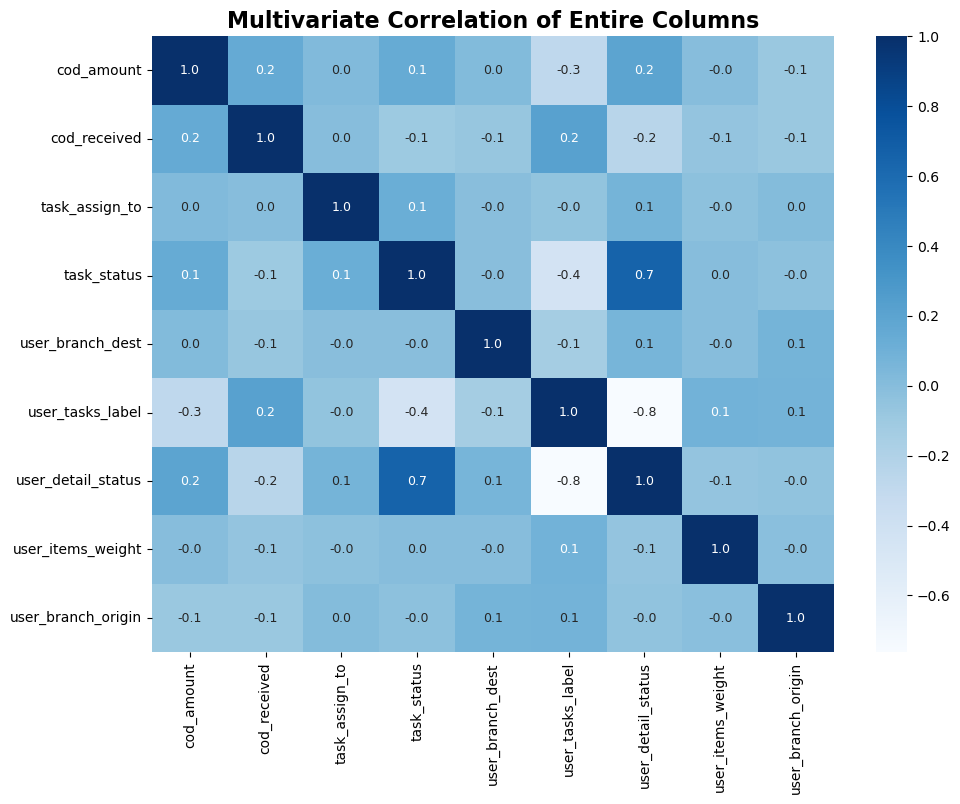

In [12]:
plt.figure(figsize=(11,8))
# plot heatmap for correlate all variable in database with blue color map, annotation
sns.heatmap(data_modelling.corr(), annot=True, cmap='Blues', fmt='.1f', annot_kws={'fontsize':9})
plt.title('Multivariate Correlation of Entire Columns', fontsize=16, fontweight='bold')
plt.show()

In [13]:
# standarization scaling with Minmax Scaler
minmax = MinMaxScaler()

# data scaling with minmax scaler transformation 
X = minmax.fit_transform(data_modelling)
# create new dataframe for scaled value
data_scaled = pd.DataFrame(data=X, columns=data_modelling.columns) 

data_scaled[0:15].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cod_amount,0.144820,0.011311,0.037949,0.006726,0.030563,0.043681,0.008076,0.006977,0.013925,0.005666,0.014258,0.031290,0.011416,0.008964,0.007294
cod_received,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
task_assign_to,0.673843,0.693219,0.693219,0.693219,0.693219,0.693219,0.673843,0.673843,0.398278,0.398278,0.398278,0.398278,0.398278,0.398278,0.398278
task_status,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user_branch_dest,0.819672,0.508197,0.508197,0.508197,0.508197,0.508197,0.819672,0.819672,0.508197,0.508197,0.508197,0.508197,0.508197,0.508197,0.508197
user_tasks_label,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
user_detail_status,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774,0.096774
user_items_weight,0.064198,0.006420,0.014815,0.003062,0.014815,0.012346,0.003457,0.000198,0.003951,0.000494,0.001877,0.004938,0.000494,0.000988,0.002469
user_branch_origin,0.203390,0.203390,0.203390,0.203390,0.203390,0.203390,0.203390,0.203390,0.203390,0.203390,0.203390,1.000000,0.203390,0.203390,0.203390


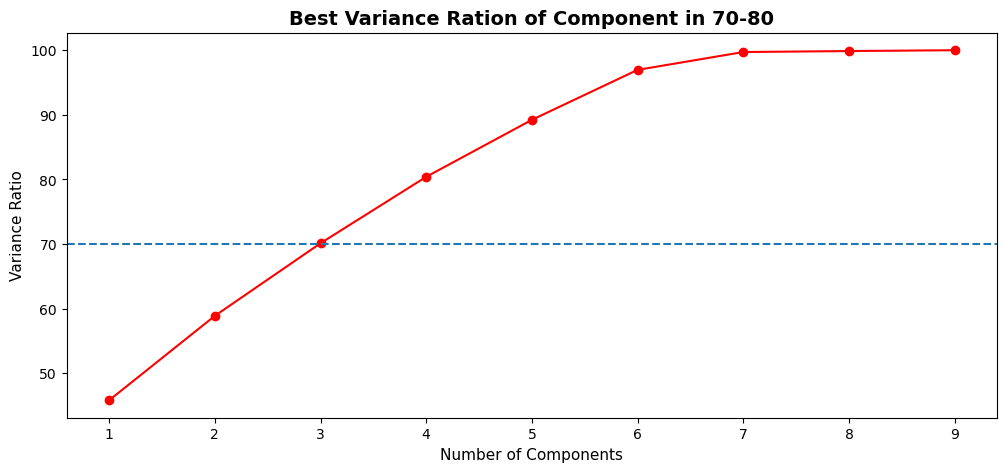

In [115]:
variance_ratio = []

# ulangi jumlah komponen berdasarkan jumlah kolom 
for com in range(1, len(data_scaled.columns)+1):
    # jalankan analisis komponen PCA sesuai jumlah iterasi
    pca = PCA(n_components=com)
    pca.fit(data_scaled)
    # hitung total masing-masing jumlah explained variance ratio dari iterasi
    variance_ratio.append(pca.explained_variance_ratio_.sum()*100)

# tampilkan hasil pencarian PCA secara iterasi, untuk memperoleh jumlah komponen terbaik 
plt.figure(figsize=(12,5))
plt.plot(range(1, len(data_scaled.columns)+1), variance_ratio, marker='o', color='red')
plt.title('Best Variance Ration of Component in 70-80', fontsize=14, fontweight='bold')
plt.axhline(y=70, linestyle='--')
plt.xlabel('Number of Components', fontsize=11)
plt.ylabel('Variance Ratio', fontsize=11)
plt.show()

In [116]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(data_scaled)
X_pca = pd.DataFrame(data=X_pca, columns=['Component 1', 'Component 2', 'Component 3'])
# tampilkan jumlah data teratas
X_pca[0:10].T

,0,1,2,3,4,5,6,7,8,9
Component 1,-0.523309,-0.549646,-0.549250,-0.549707,-0.549368,-0.549149,-0.525277,-0.525283,-0.563145,-0.563265
Component 2,-0.041229,0.224059,0.224247,0.224029,0.224193,0.224292,-0.042177,-0.042181,0.137683,0.137625
Component 3,0.262103,0.170864,0.170732,0.170888,0.170768,0.170704,0.262787,0.262793,-0.088004,-0.087963


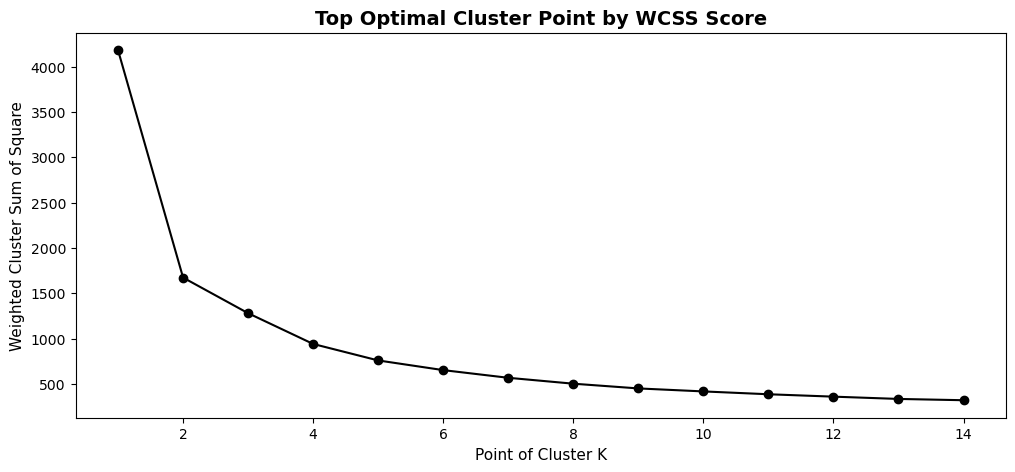

In [117]:
wcss_score = []

# iterasi antara cluster k 1 sampai k 14
for clust in range(1,15):
    # pencarian cluster menggunakan dataframe PCA sebelumnya
    kmeans = KMeans(n_clusters=clust, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss_score.append(kmeans.inertia_)

plt.figure(figsize=(12,5))
plt.plot(range(1, 15), wcss_score, marker='o', color='black')
plt.title('Top Optimal Cluster Point by WCSS Score', fontsize=14, fontweight='bold')
plt.xlabel('Point of Cluster K', fontsize=11)
plt.ylabel('Weighted Cluster Sum of Square', fontsize=11)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
cluster = kmeans.predict(data_scaled)

In [15]:
# memasukan label cluster ke dataset yang digunakan untuk modelling
data_scaled['cluster'] = cluster + 1
# memasukan label cluster ke dataset aslinya
data_modelling['cluster'] = data_scaled['cluster'] 
# insert cluster column to original dataset customer_transaction, because value is not encoded
df_sample['cluster'] = data_scaled['cluster']

# tampilkan dataset baru dengan 20 teratas
df_sample.head(20)

,task_longitude_done,task_lattitude_done,task_created_time,cod_amount,cod_received,task_assign_to,task_completed_time,task_status,flow,task_id,...,user_items_weight,user_branch_origin,user_task_status,task_created_year,task_created_month,task_created_day,task_completed_year,task_completed_month,task_completed_day,cluster
0,109.762910,-6.926608,2022-11-01 13:17:26,685000.0,True,pacifiedLion0,2022-11-01 13:46:30,done,Delivery,4fe3b237c832ca4841a2,...,13.00,CGK,COLF01,2022,11,1,2022,11,1,4
1,110.033986,-7.876154,2022-11-01 01:41:07,53500.0,True,peacefulTacos6,2022-11-01 05:33:48,done,Delivery,08a4da25256affae8446,...,1.30,CGK,COLF01,2022,11,1,2022,11,1,4
2,109.999733,-7.849777,2022-11-01 01:41:07,179500.0,True,peacefulTacos6,2022-11-01 06:41:57,done,Delivery,2ff0dc469826158b7684,...,3.00,CGK,COLF01,2022,11,1,2022,11,1,4
3,110.003708,-7.710998,2022-11-01 01:41:07,31815.0,True,peacefulTacos6,2022-11-01 11:18:19,done,Delivery,331c172c2b383f774328,...,0.62,CGK,COLF01,2022,11,1,2022,11,1,4
4,110.013887,-7.829742,2022-11-01 01:41:07,144562.0,True,peacefulTacos6,2022-11-01 03:51:49,done,Delivery,a9d53fa96c80baee8b23,...,3.00,CGK,COLF01,2022,11,1,2022,11,1,4
5,110.023131,-7.706646,2022-11-01 01:41:07,206610.0,True,peacefulTacos6,2022-11-01 12:34:44,done,Delivery,67ec7d34b4f3adbf2895,...,2.50,CGK,COLF01,2022,11,1,2022,11,1,4
6,109.762910,-6.926608,2022-11-01 05:00:28,38200.0,True,pacifiedLion0,2022-11-01 13:46:03,done,Delivery,2079aa99bda230940785,...,0.70,CGK,COLF01,2022,11,1,2022,11,1,4
7,109.729141,-6.911588,2022-11-01 07:23:20,33000.0,True,pacifiedLion0,2022-11-01 08:45:13,done,Delivery,b3975d6adb8e802c749b,...,0.04,CGK,COLF01,2022,11,1,2022,11,1,4
8,109.780323,-7.663731,2022-11-01 02:13:16,65867.0,True,giddyCockatoo1,2022-11-01 08:39:01,done,Delivery,ea26e88eaf27edd7885b,...,0.80,CGK,COLF01,2022,11,1,2022,11,1,4
9,109.780821,-7.663288,2022-11-01 02:13:16,26800.0,True,giddyCockatoo1,2022-11-01 08:36:44,done,Delivery,f53a4daf67534816dbd9,...,0.10,CGK,COLF01,2022,11,1,2022,11,1,4


In [16]:
# using value counts from X dataframe then sort by cluster index
df_sample['cluster'].value_counts().sort_index()

1    2145
2    4732
3     762
4     695
Name: cluster, dtype: int64

Tugas pengiriman terbanyak berasal dari Cluster 1, sedangkan pengiriman dari Cluster 2 dan 4 paling sedikit

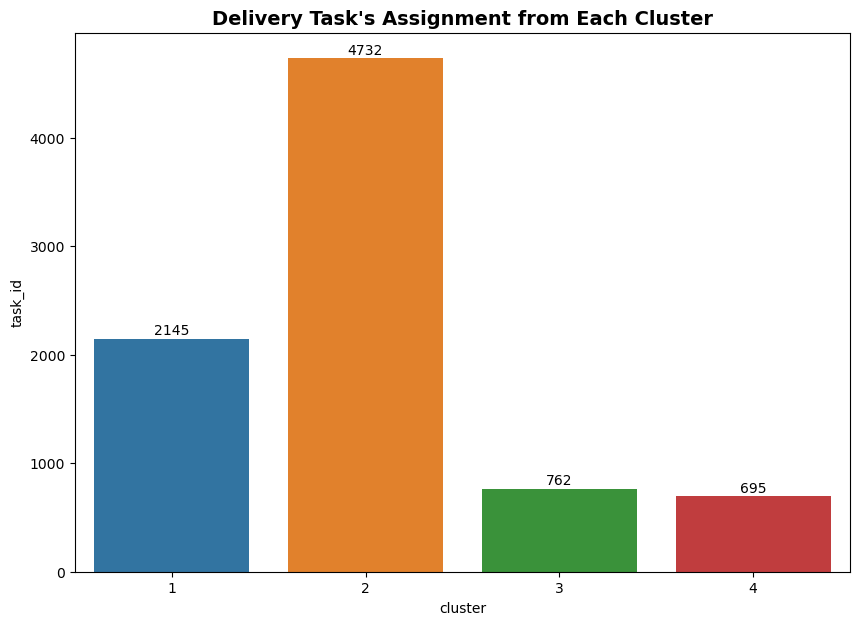

In [17]:
plt.figure(figsize=(10,7))
aux = df_sample.groupby('cluster')['task_id'].nunique().reset_index()
sbar = sns.barplot(data=aux, x='cluster', y='task_id')

# bar plot annotation
for p in sbar.patches:
    sbar.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 6), textcoords = 'offset points')

plt.title('Delivery Task\'s Assignment from Each Cluster', fontsize=14, fontweight='bold')
plt.show()

In [138]:
df_sample[data_modelling.columns]

,cod_amount,cod_received,task_assign_to,task_status,user_branch_dest,user_tasks_label,user_detail_status,user_items_weight,user_branch_origin,cluster
0,685000.0,True,pacifiedLion0,done,SRG,Success,D01,13.00,CGK,4
1,53500.0,True,peacefulTacos6,done,MGL,Success,D01,1.30,CGK,4
2,179500.0,True,peacefulTacos6,done,MGL,Success,D01,3.00,CGK,4
3,31815.0,True,peacefulTacos6,done,MGL,Success,D01,0.62,CGK,4
4,144562.0,True,peacefulTacos6,done,MGL,Success,D01,3.00,CGK,4
...,...,...,...,...,...,...,...,...,...,...
8329,0.0,False,debonairPonie1,done,CGK,Success,D10,1.00,CGK,1
8330,0.0,False,murkyThrushe3,done,JOG,Failed,U01,1.00,TGR,3
8331,0.0,False,enragedCake7,done,TKG,Success,D01,1.44,CGK,1
8332,151000.0,False,lyingPaella2,done,KOE,Failed,U03,0.60,CGK,3


In [140]:
print('Task Status : ',df_sample['task_status'].unique())
print('User Task Label : ',df_sample['user_tasks_label'].unique())

Task Status :  ['done' 'ongoing']
User Task Label :  ['Success' 'Failed']


berikut merupakan penjelasan detil dari pembagian cluster berdasarkan visualisasi crosstab

pembagian cluster ditentukan oleh 
- jumlah cod (`cod_amount`), jumlah transaksi cash on delivery
- cod yang sudah direview(`cod_received`) , cash on delivery yang sudah di review oleh penerima pesanan
- status tugas (`task_status`), informasi mengenai keterangan tugas pengiriman yang dilakukan oleh kurir apakah sudah selesai atau dalam perjalanan
- status pengiriman dari penerima (`user_task_label`), keterangan tugas dari penerima pesanan apakah sudah diterima atau belum


In [18]:
# calculate mean of each feature with groupby cluster
tabular_cluster = data_modelling.groupby('cluster').mean().T
tabular_cluster['Feature Mean'] = X.mean().T
display(tabular_cluster)

# display column visualization with colored tabular chart
tabular_cluster.drop(columns='Feature Mean').style.background_gradient(cmap='PRGn', axis=1)

cluster,1,2,3,4,Feature Mean
cod_amount,115545.080653,1457.304100,131276.438320,138040.097842,0.276241
cod_received,0.000000,0.000000,0.000000,1.000000,0.276241
task_assign_to,1360.367366,1366.864751,1710.237533,1401.374101,0.276241
task_status,0.000000,0.000000,1.000000,0.000000,0.276241
user_branch_dest,34.135198,27.808326,28.973753,24.926619,0.276241
user_tasks_label,0.000000,1.000000,0.000000,1.000000,0.276241
user_detail_status,18.709557,7.131234,32.000000,4.395683,0.276241
user_items_weight,1.443599,3.080560,2.473845,1.216245,0.276241
user_branch_origin,17.627972,20.941251,18.001312,15.273381,0.276241


cluster,1,2,3,4
cod_amount,115545.080653,1457.304100,131276.438320,138040.097842
cod_received,0.000000,0.000000,0.000000,1.000000
task_assign_to,1360.367366,1366.864751,1710.237533,1401.374101
task_status,0.000000,0.000000,1.000000,0.000000
user_branch_dest,34.135198,27.808326,28.973753,24.926619
user_tasks_label,0.000000,1.000000,0.000000,1.000000
user_detail_status,18.709557,7.131234,32.000000,4.395683
user_items_weight,1.443599,3.080560,2.473845,1.216245
user_branch_origin,17.627972,20.941251,18.001312,15.273381


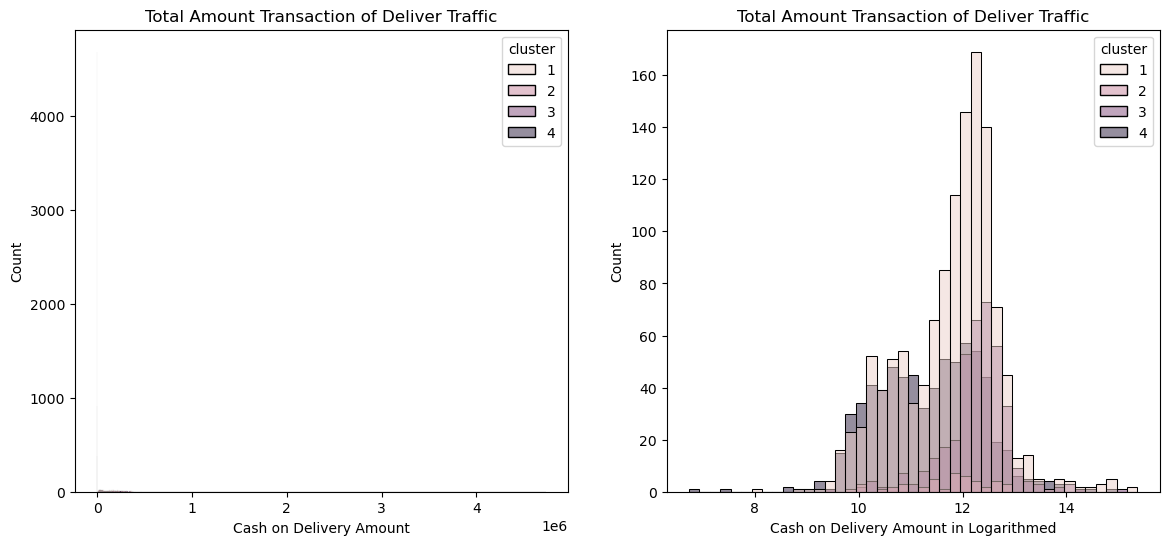

In [28]:
cod_df = pd.DataFrame({'cod_amount': df_sample['cod_amount'], 'log_cod_amount': np.log(df_sample['cod_amount']), 
                       'cluster': df_sample['cluster']})

fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.histplot(data=cod_df, x='cod_amount', hue='cluster', ax=axes[0])
axes[0].set_title('Total Amount Transaction of Deliver Traffic')
axes[0].set_xlabel('Cash on Delivery Amount')

# sns.histplot(data=cod_df, x='cod_amount', hue='cluster')
sns.histplot(data=cod_df, x='log_cod_amount', hue='cluster', ax=axes[1])
axes[1].set_title('Total Amount Transaction of Deliver Traffic')
axes[1].set_xlabel('Cash on Delivery Amount in Logarithmed')
plt.show()

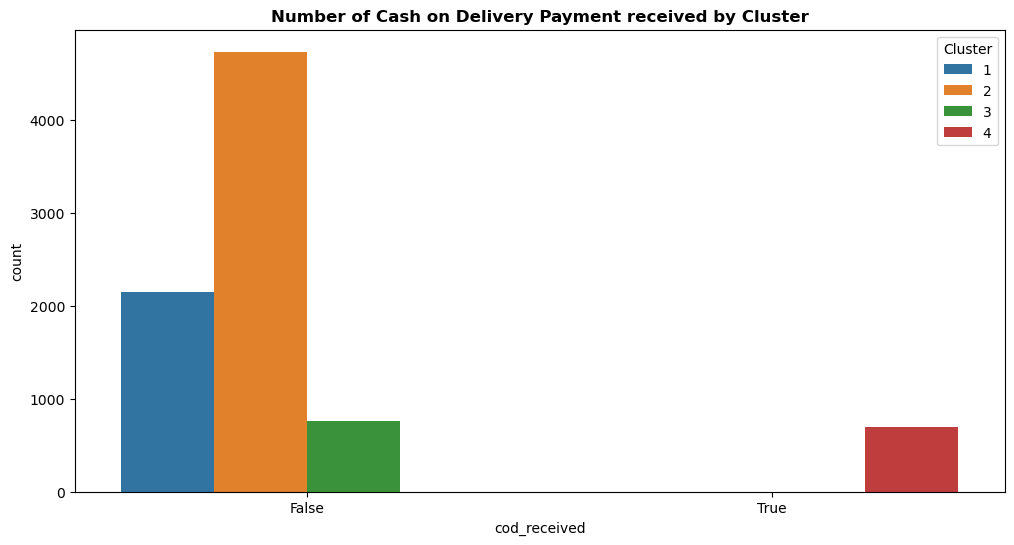

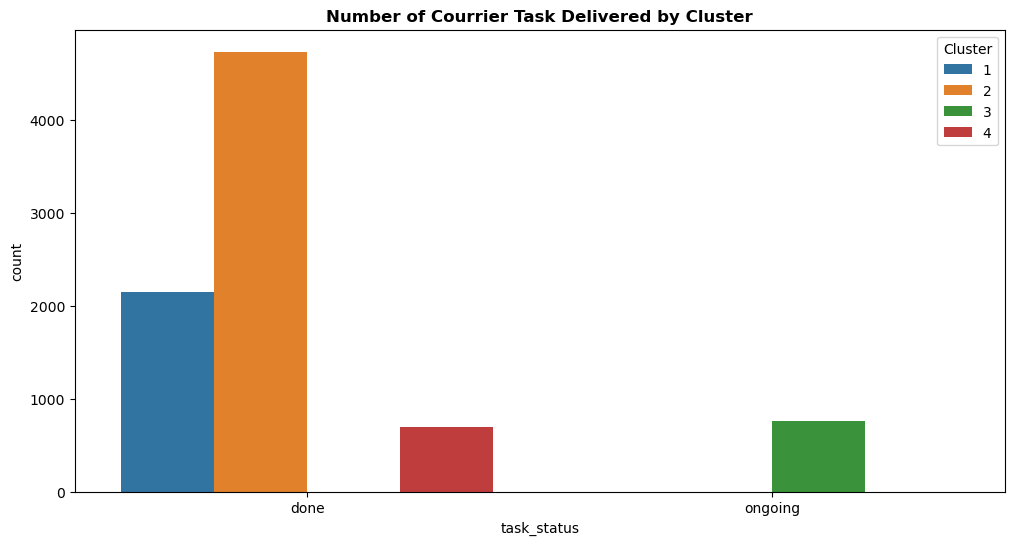

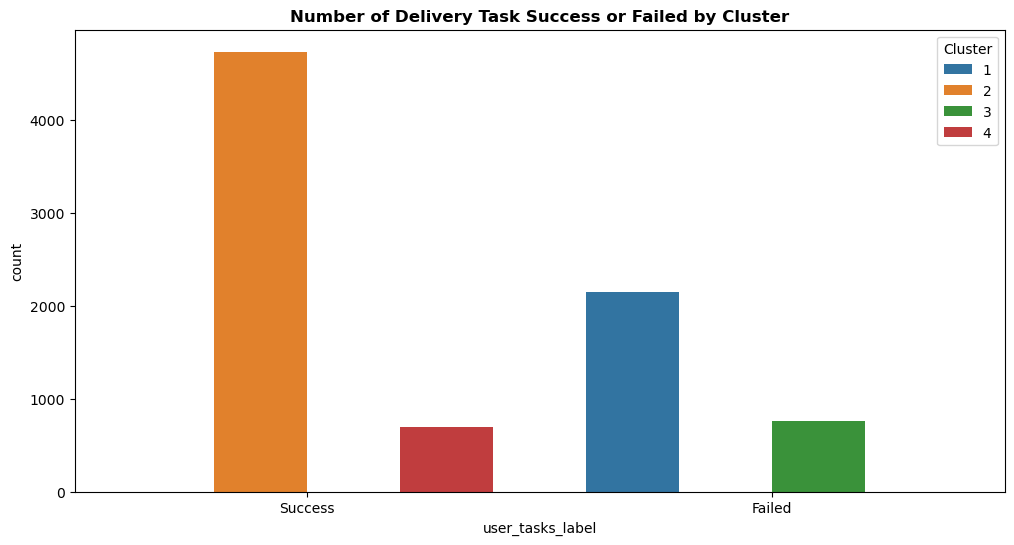

In [38]:
for col in ['cod_received', 'task_status', 'user_tasks_label']:
    if col == 'cod_received':
        plt.figure(figsize=(12,6))
        sns.countplot(data=df_sample, x=col, hue='cluster')
        plt.title('Number of Cash on Delivery Payment received by Cluster', fontweight='bold', fontsize=12)
        plt.legend(title='Cluster', loc='upper right')
        plt.show()
    elif col == 'task_status':
        plt.figure(figsize=(12,6))
        sns.countplot(data=df_sample, x=col, hue='cluster')
        plt.title('Number of Courrier Task Delivered by Cluster', fontweight='bold', fontsize=12)
        plt.legend(title='Cluster', loc='upper right')
        plt.show()
    elif col == 'user_tasks_label':
        plt.figure(figsize=(12,6))
        sns.countplot(data=df_sample, x=col, hue='cluster')
        plt.title('Number of Delivery Task Success or Failed by Cluster', fontweight='bold', fontsize=12)
        plt.legend(title='Cluster', loc='upper right')
        plt.show()


cluster 1
- transaksi cod nya yang paling sedikit
- cod yang belum di review
- pengiriman yang relatif masih dalam pengerjaan
- namun pengirimannya cenderung berhasil
- pengiriman ke daerah penerima pesan yang relatif sedikit

cluster 2
- transaksi cod nya yang cenderung lebih tinggi 
- cod yang belum di review
- pengiriman yang cenderung sudah dikerjakan
- namun pengirimannya cenderung tidak berhasil
- pengiriman ke daerah penerima pesan yang relatif sedikit

cluster 3
- transaksi cod nya yang relativ tinggi
- cod yang belum di review
- pengiriman yang relatif masih dalam pengerjaan
- namun pengirimannya cenderung tidak berhasil
- pengiriman ke daerah penerima pesan yang paling banyak

cluster 4
- transaksi cod nya yang paling tinggi
- cod yang sudah di review
- pengiriman yang relatif masih dalam pengerjaan
- namun pengirimannya cenderung berhasil
- pengiriman ke daerah penerima pesan yang paling sedikit